# Aprendizaje Automático - Práctica 1 - Búsqueda Iterativa de Óptimos y Regresión Lineal





---

## <font color='blue'>Ejercicio 1: BÚSQUEDA ITERATIVA DE ÓPTIMOS (6.5 puntos)</font>

### <font color='blue'>(1.5 puntos) Implementación de Gradiente Descendente.</font>



#### <font color='blue'>(a) Implementar el algoritmo de gradiente descendente y verificar su correcto funcionamiento con una función convexa. </font>


In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [11]:
'''
Esta función muestra una figura 3D con la función a optimizar junto con el 
óptimo encontrado y la ruta seguida durante la optimización.
    rng_val: rango de valores a muestrear en np.linspace()
    fun: función a optimizar y mostrar
    ws: conjunto de pesos (pares de valores [x,y] que va recorriendo el optimizador
                           en su búsqueda iterativa hacia el óptimo)
    views: ángulo de visión desde el que se mostrará la función en 3D
    colormap: mapa de color empleado en la visualización
    title_fig: título superior de la figura
    
Ejemplo de uso: display_figure(2, E, ws, [45,30], 'plasma','Descenso de gradiente')
'''

def display_figure(rng_val, fun, ws, views, colormap, title_fig):
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    Z = fun(np.array([X, Y]))
    fig = plt.figure(figsize=(25, 15))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=colormap, alpha=.6)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:,0], ws[:,1], fun(ws.transpose()), 'r*', markersize=5)
        ax.plot(min_point_[0], min_point_[1], fun(min_point_), 'r*', markersize=10)
    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('E(u,v)')
    ax.view_init(azim=views[0], elev=views[1])
    plt.show()

In [12]:
'''
Esta función toma como entrada:
- w_ini: punto inicial
- lr: learning rate
- grad_fun: función gradiente con la que se opera
- fun: función que se quiere minimizar
- epsilon: umbral que permite, si fun(w) >= epsilon, parar el algoritmo
- max_iters: número máximo de iteraciones que permite, si se alcanza ese valor, parar el algoritmo
- show_evol: flag que, si es True, muestra la evolución de los pesos, el gradiente y el valor de la función. De utilidad para depuración de código. 

Y proporciona como salida: 
- w: mínimo encontrado
- it: iteración en que se encontró
- ws: lista con todos los puntos recorridos durante la trayectoria. Téngase en cuenta que ws[-1]==w
'''
def gd(w_ini, lr, grad_fun, fun, epsilon, max_iters = 100000, show_evol = False):
    it = 0
    w = w_ini.copy()
    ws = []
    ws.append(w)
    if show_evol:
      print('w_ini = ', w)
      print(fun(w))
      print(grad_fun(w))
    # Criterio de parada: numero de iteraciones y 
    # valor de f inferior a epsilon
    while it < max_iters and  fun(w) >= epsilon: 
        it += 1 #incremeno el contador de iteraciones
        # Actualización de los pesos en la dirección opuesta al gradiente
        w = w - lr * grad_fun(w)
        # Añadir el nuevo valor de w a la lista ws
        ws.append(w)
        if show_evol:
          print('w_{} = {}'.format(it,w))
          print(fun(w))
          print(grad_fun(w))

    return w, it, ws
    


<font color='blue'>Verifíquese el correcto funcionamiento del código implementado con la función convexa $E(u,v)=u^2+v^2$, cuyo mínimo se encuentra en el punto $(0.0,0.0)$. Punto inicial: $(-4.0, 4.0)$, $\textit{learning rate}$ ($\eta$) de $0.01$, $100.000$ como número máximo de iteraciones, y $\epsilon = 1e-50$.</font>

Para obtener la expresión del gradiente, tengo que realizar las derivadas parciales de la función respecto a sus dos variables:

$\frac{\partial}{\partial u} E(u,v) = 2u $

$\frac{\partial}{\partial v} E(u,v) = 4v $


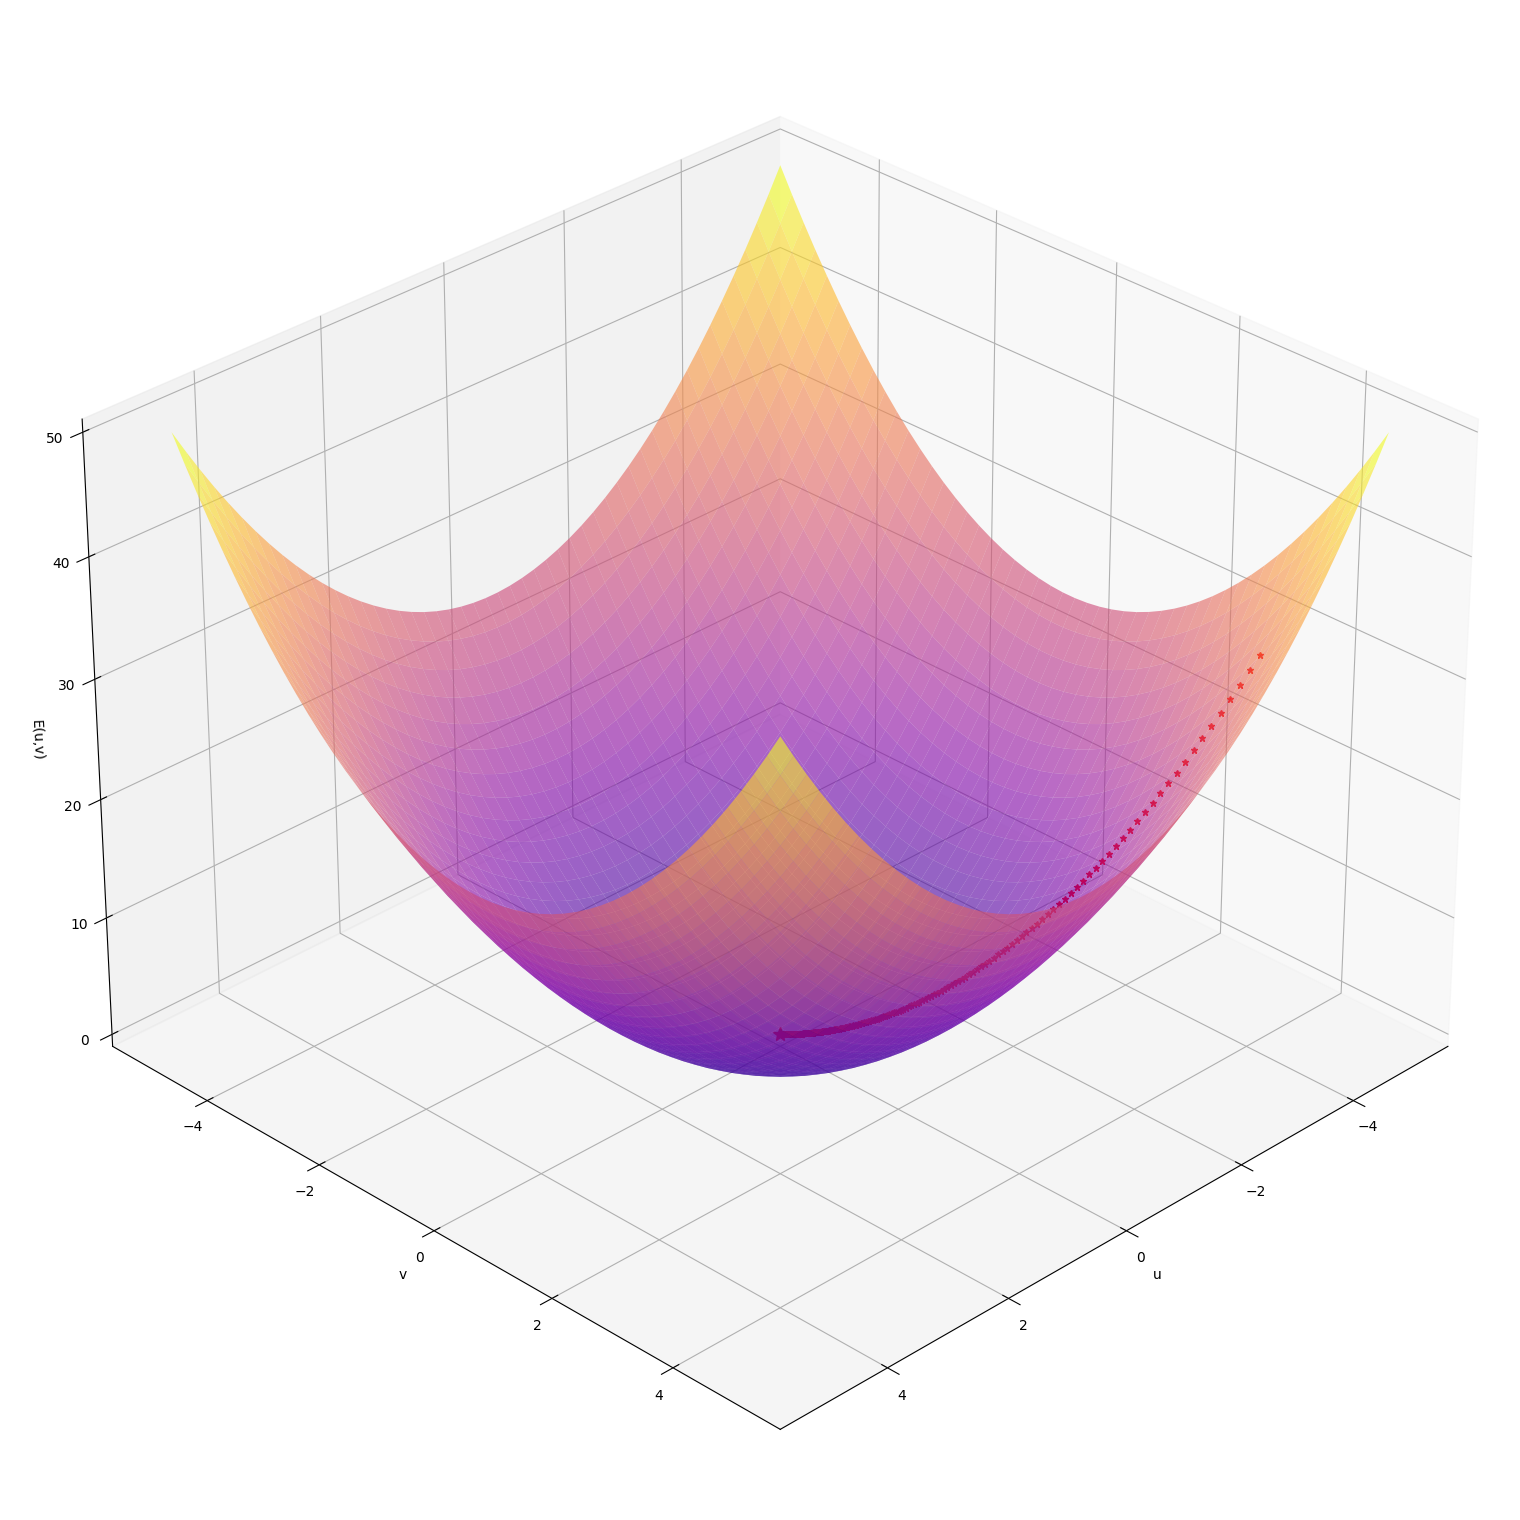

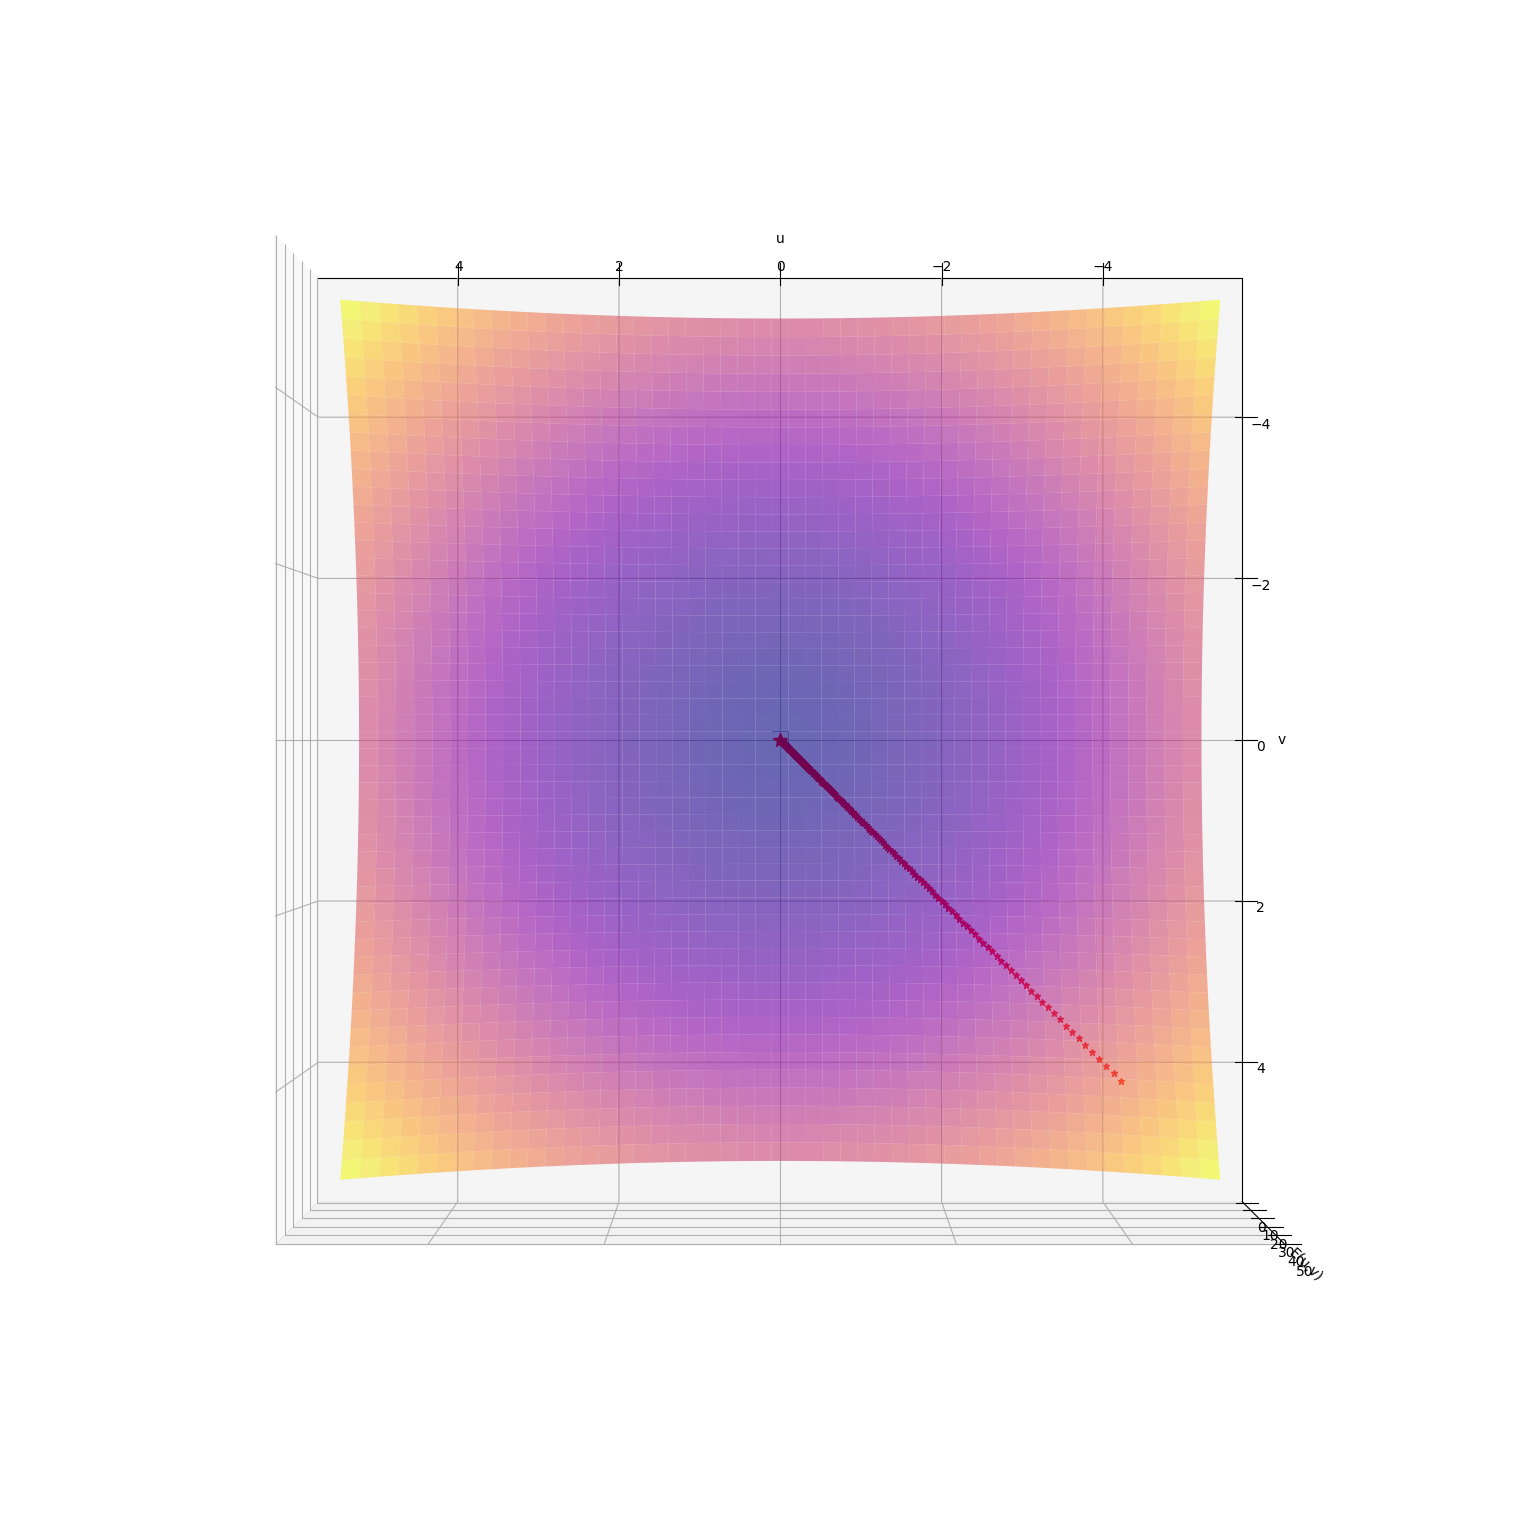

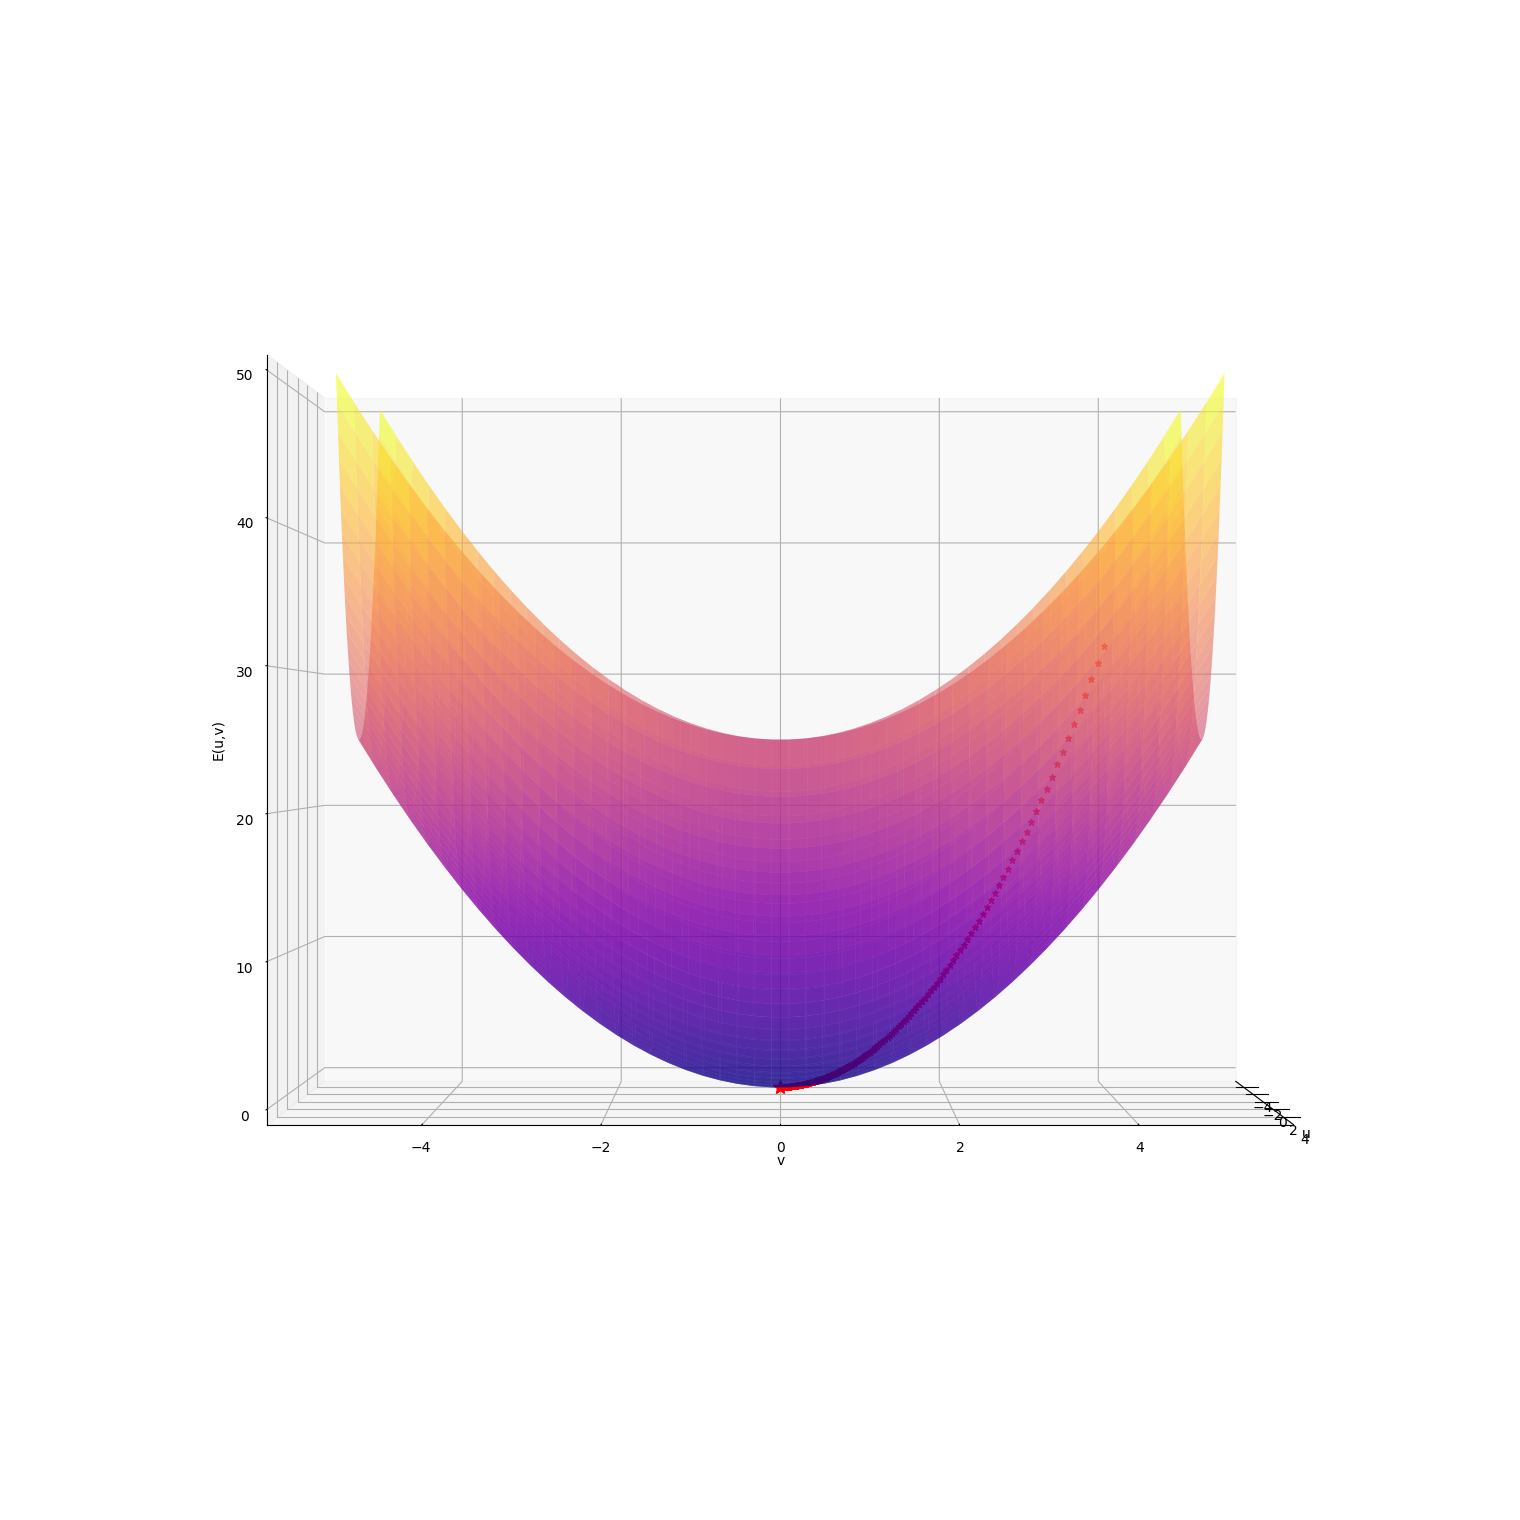

In [13]:
def E(w):
  u = w[0]
  v = w[1]
  return u**2.0 + v**2.0

# Derivada parcial de E respecto de u
def E_u(w):
    return 2*w[0]

# Derivada parcial de E respecto de v
def E_v(w):
    return 2*w[1]
        
# Gradiente de E
def gradE(w):
    return np.array([E_u(w), E_v(w)])

w, k, ws = gd(np.array([-4.0,4.0]), 0.01, gradE, E, 1e-50, show_evol = False)

display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')
display_figure(5, E, ws, [0,0], 'plasma','')

<font color='blue'>¿Cuántas iteraciones ha empleado el algoritmo hasta converger? ¿Qué punto ha alcanzado? Comente también si el comportamiento del algoritmo es el esperado y porqué lo considera así. </font>

In [14]:
print ('Numero de iteraciones: ', k)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')

Numero de iteraciones:  2936
Coordenadas obtenidas: ( -6.947334735484934e-26 ,  6.947334735484934e-26 )


>Como se puede observar, el número de iteraciones es 2936, alcanzando un valor $10^{-26}$. El resultado es el esperado, al ser una función convexa con un único mínimo situado en el (0,0) la función avanza hacia el mínimo global y finaliza cuando alcanza la exactitud esperada pues el criterio de parada que se cumple es la comparacion entre los valores de la función y de epsilon

#### <font color='blue'>b) Realizar la misma operación que en el apartado (a), pero con el gradiente normalizado. ¿Qué diferencias se observan?</font> 

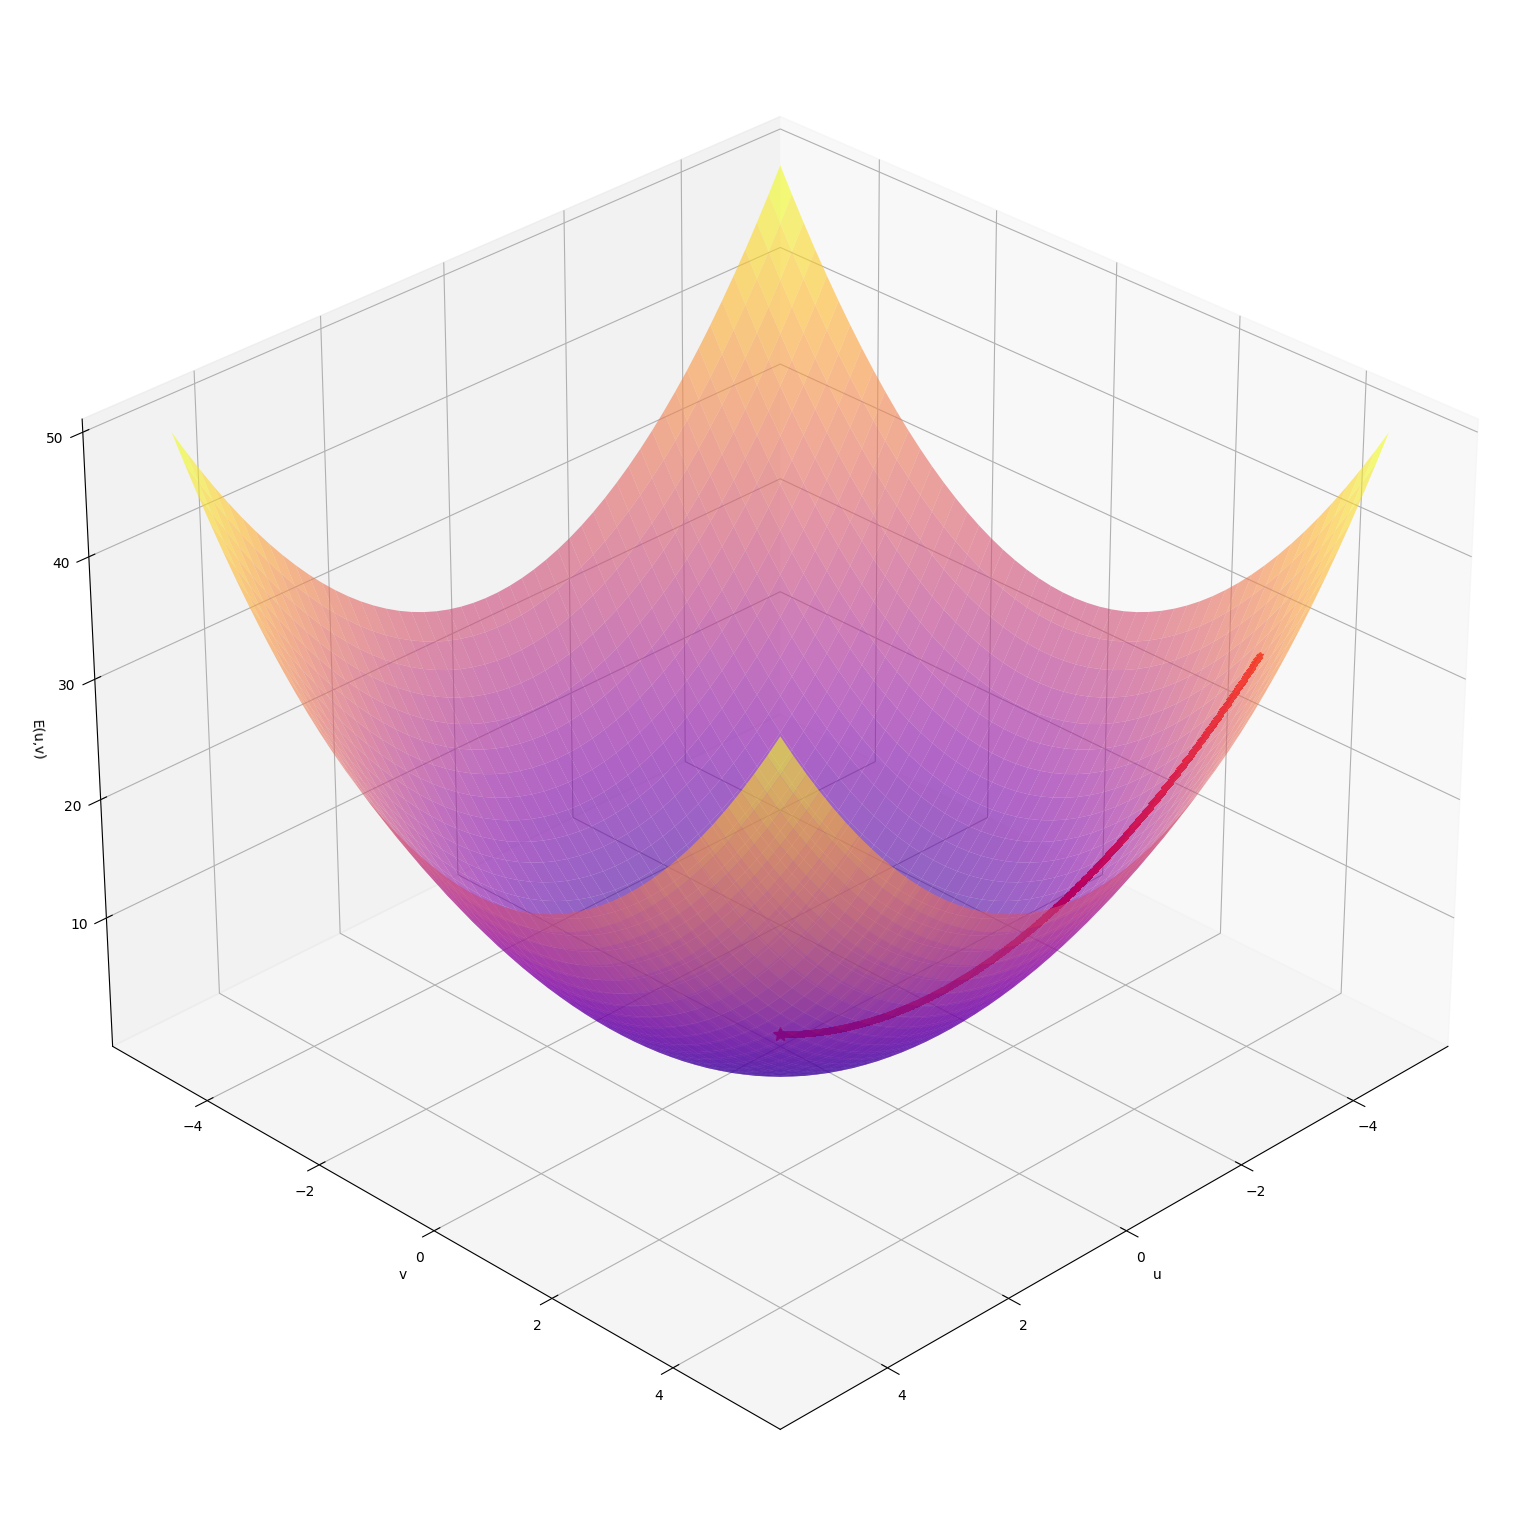

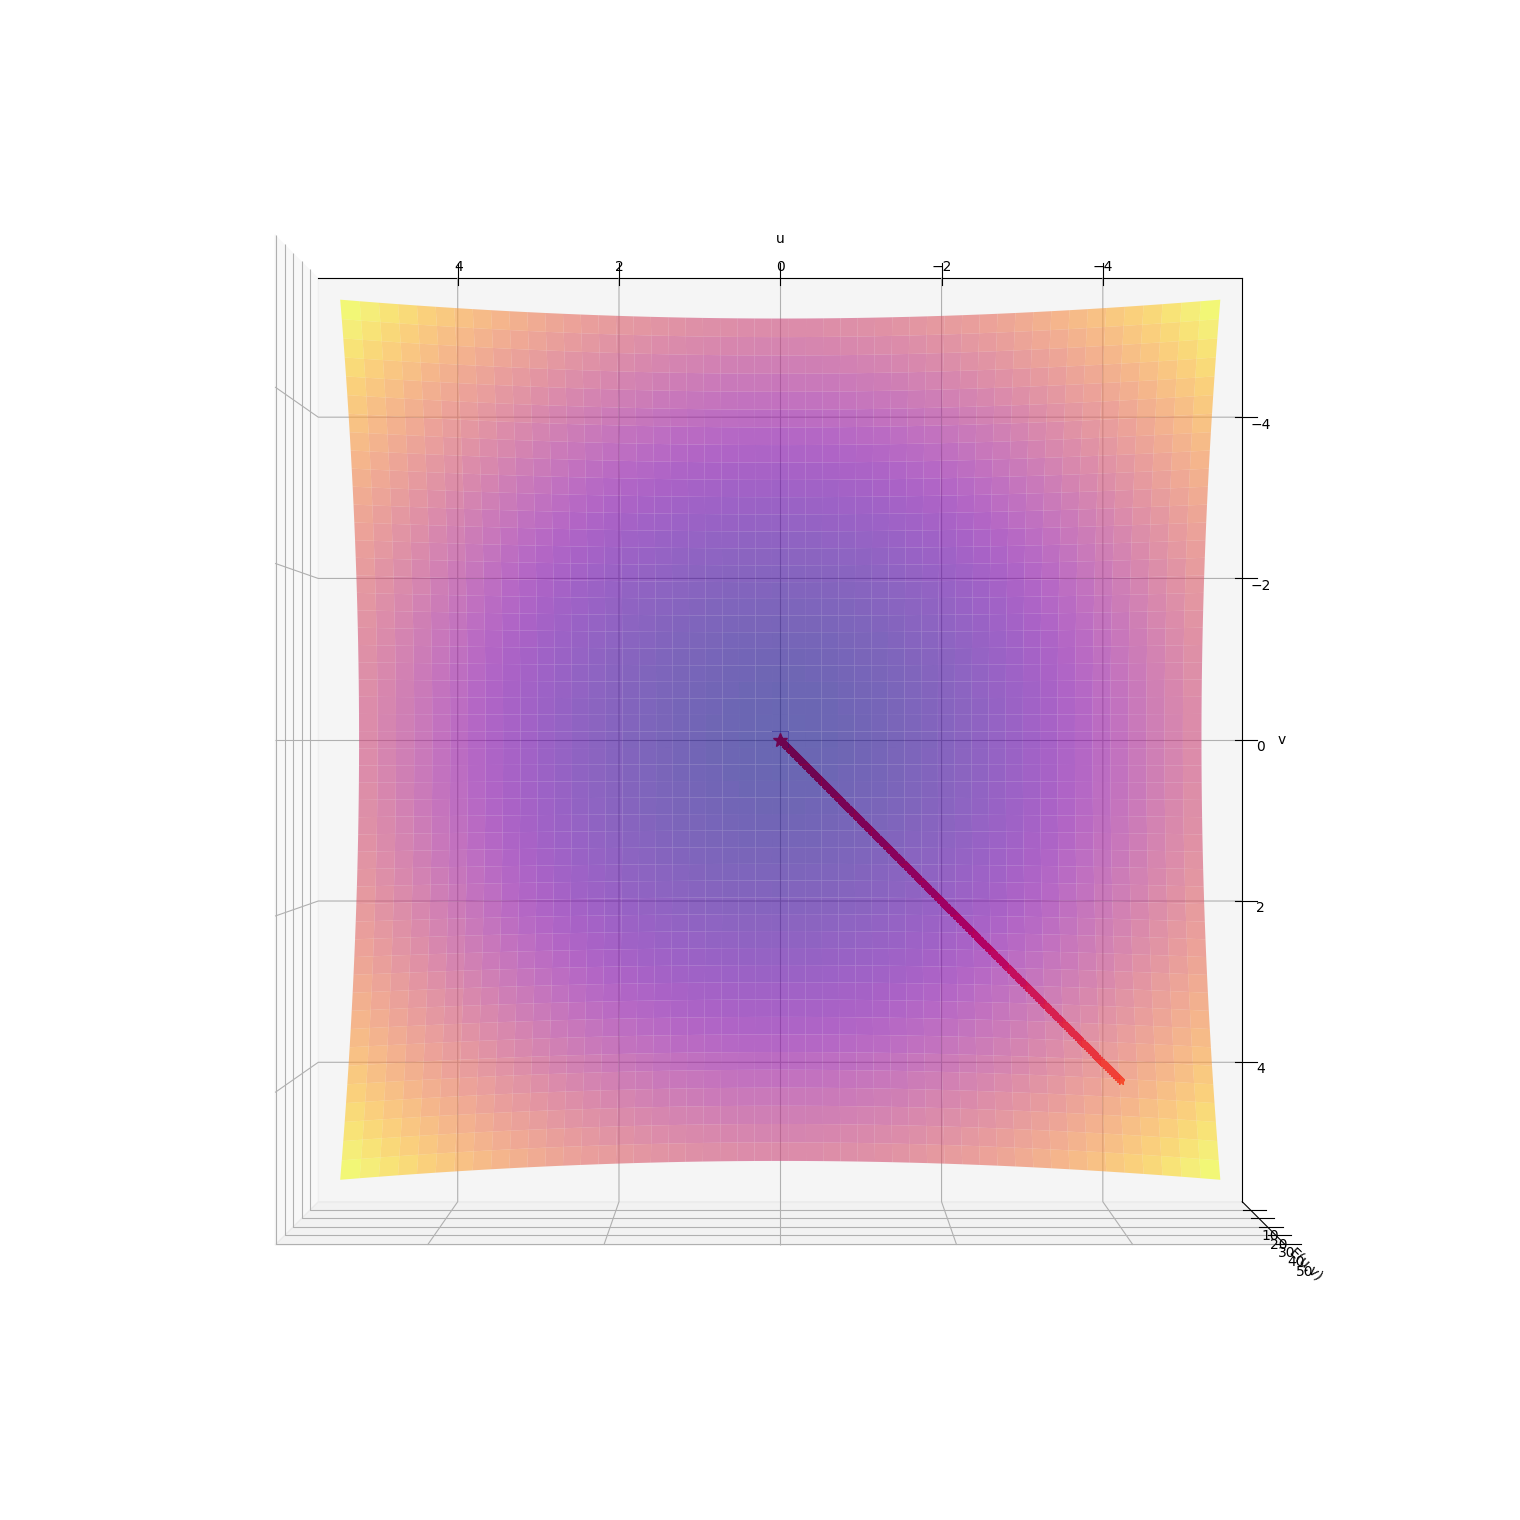

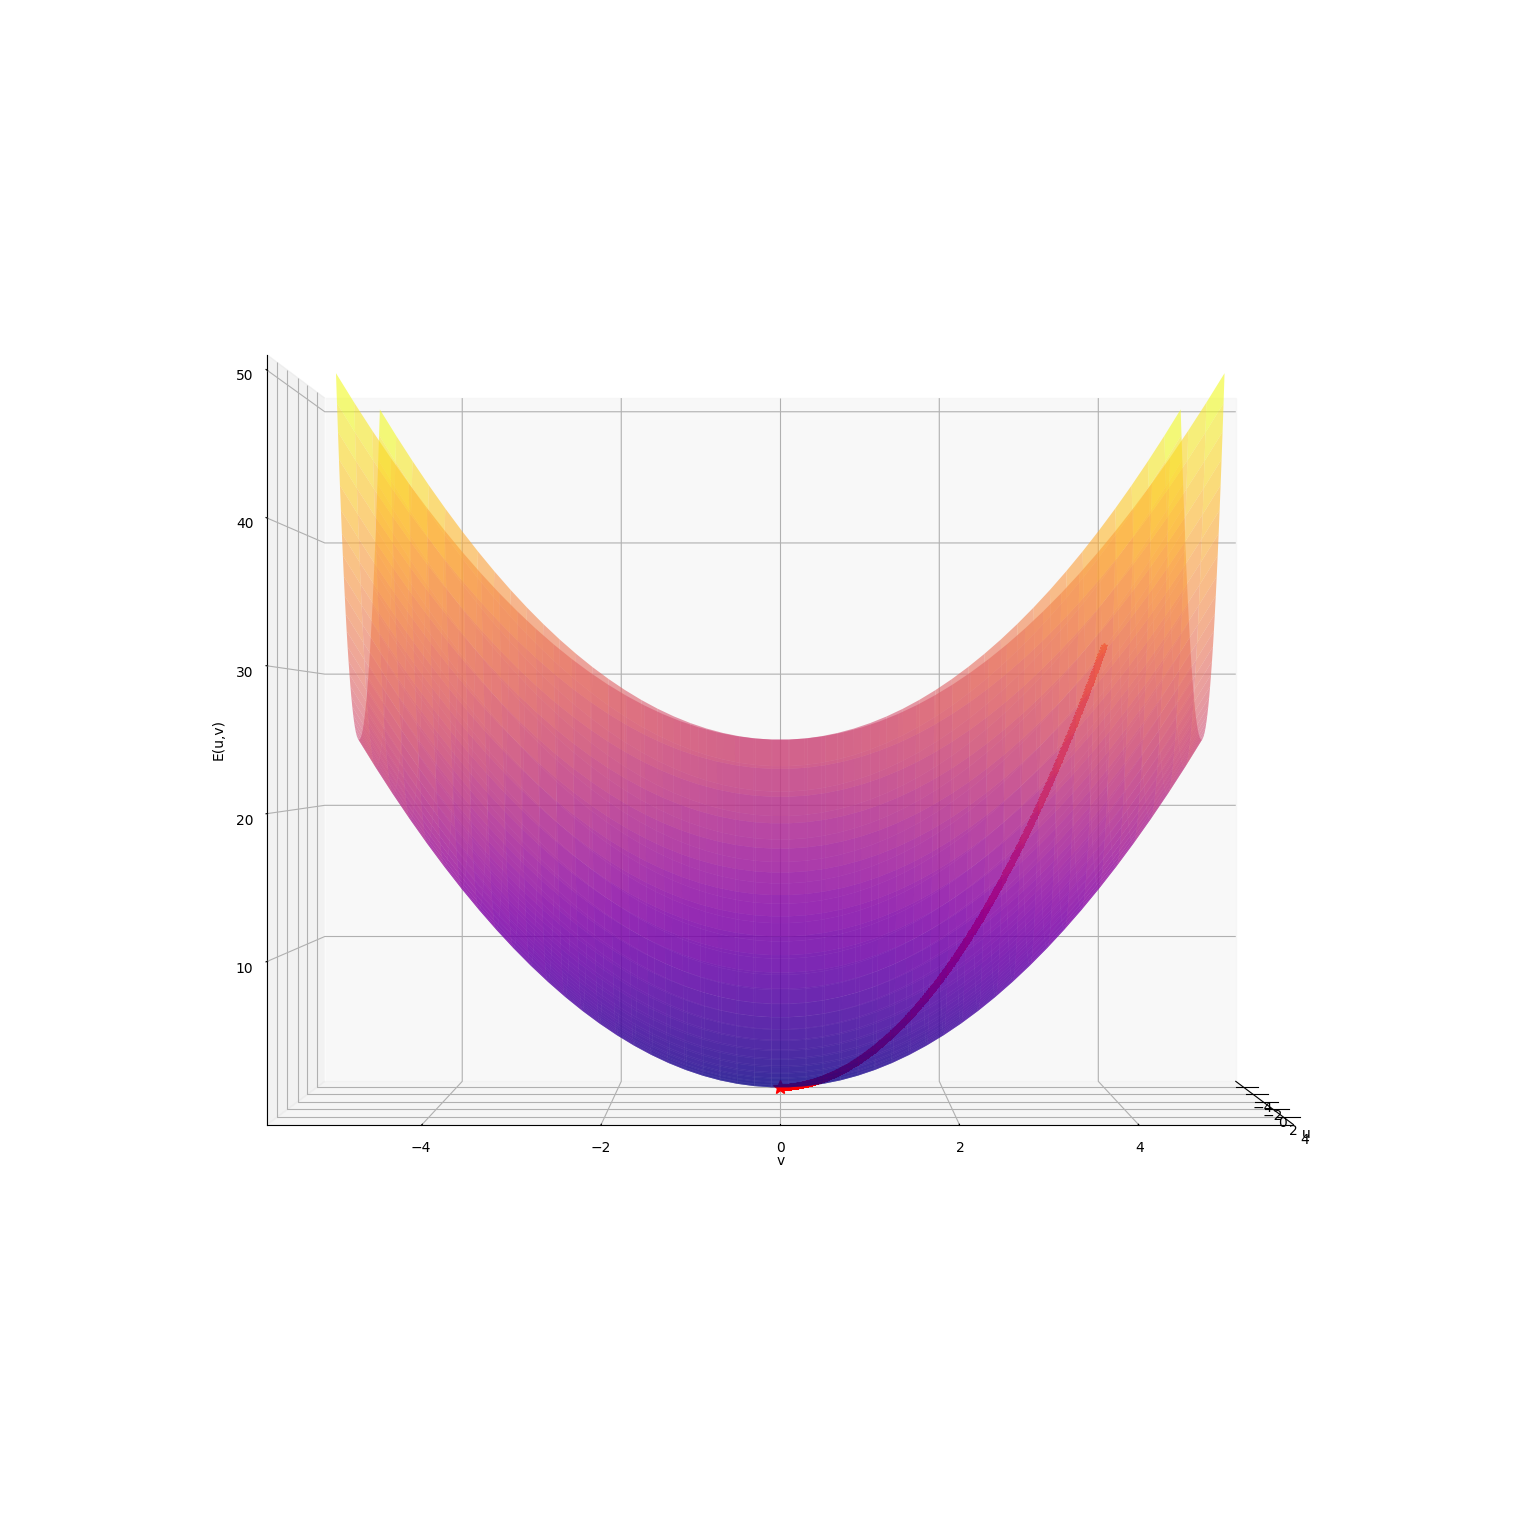

In [15]:
'''
Esta función es idéntica a la anterior, pero la actualización de w se realiza con el gradiente normalizado
'''
def gd_normalizado(w_ini, lr, grad_fun, fun, epsilon, max_iters = 100000, show_evol = False):
    it = 0
    w = w_ini.copy()
    ws = []
    ws.append(w)
    if show_evol:
      print('w_ini = ', w)
      print(fun(w))
      print(grad_fun(w))
    # Criterio de parada: numero de iteraciones y 
    # valor de f inferior a epsilon
    while it < max_iters and  fun(w) >= epsilon:
        it += 1 #incremento el contador de iteraciones
        # Actualización de los pesos en la dirección opuesta al gradiente
        #calculo el valor del gradiente y lo normalizo usando funciones de python
        grad = grad_fun(w) 
        grad_norm = np.linalg.norm(grad)
        if(grad_norm > 0):
          grad = grad / grad_norm
        w = w - lr * grad
        # Añadir el nuevo valor de w a la lista ws
        ws.append(w)
        if show_evol:
          print('w_{} = {}'.format(it,w))
          print(fun(w))
          print(grad_fun(w))

    return w, it, ws

w, k, ws = gd_normalizado(np.array([-4.0,4.0]), 0.01, gradE, E, 1e-50, show_evol = False)
display_figure(5, E, ws, [45,30], 'plasma','')
display_figure(5, E, ws, [90,90], 'plasma','')
display_figure(5, E, ws, [0,0], 'plasma','')

In [16]:
print ('Numero de iteraciones: ', k)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')

Numero de iteraciones:  100000
Coordenadas obtenidas: ( 0.0022243815158106053 ,  -0.0022243815158106053 )




> A simple vista, visualizando la función podemos imaginar que el resultado obtenido es el mismo pero estaríamos equivocados. Observando las coordenadas obtenidas y el número de iteraciones podemos observar que en este caso el valor obtenido también es cercano al (0,0) pero con mucha menos exactitud, puesto que ahora el criterio de parada es que el algoritmo alcanza el número máximo de iteraciones. Esto ocurre porque al ir calculando e siguiente punto con el gradiente normalizado, la función avanza más despacio por lo que no consigue un valor de la funcion menor que epsilon antes de las 100000 iteraciones


### <font color='blue'>(2 puntos) Influencia del learning rate. 

Considérese la función $E(u, v) = u^2 + 2v^2 + 2sin(2  \pi  u) sin(\pi  v)$</font>




#### <font color='blue'>a)  Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$. Visualizar en 3D dicha función.</font>


Las derivadas parciales de la función $E(u,v)$ respecto a sus dos variables se muestran a continuación:

$\frac{\partial}{\partial u} E(u,v) = 2u + 4\pi cos(2 \pi u) sin(\pi v)$

$\frac{\partial}{\partial v} E(u,v) = 4v + 2\pi sin(2\pi u) cos(\pi v)$



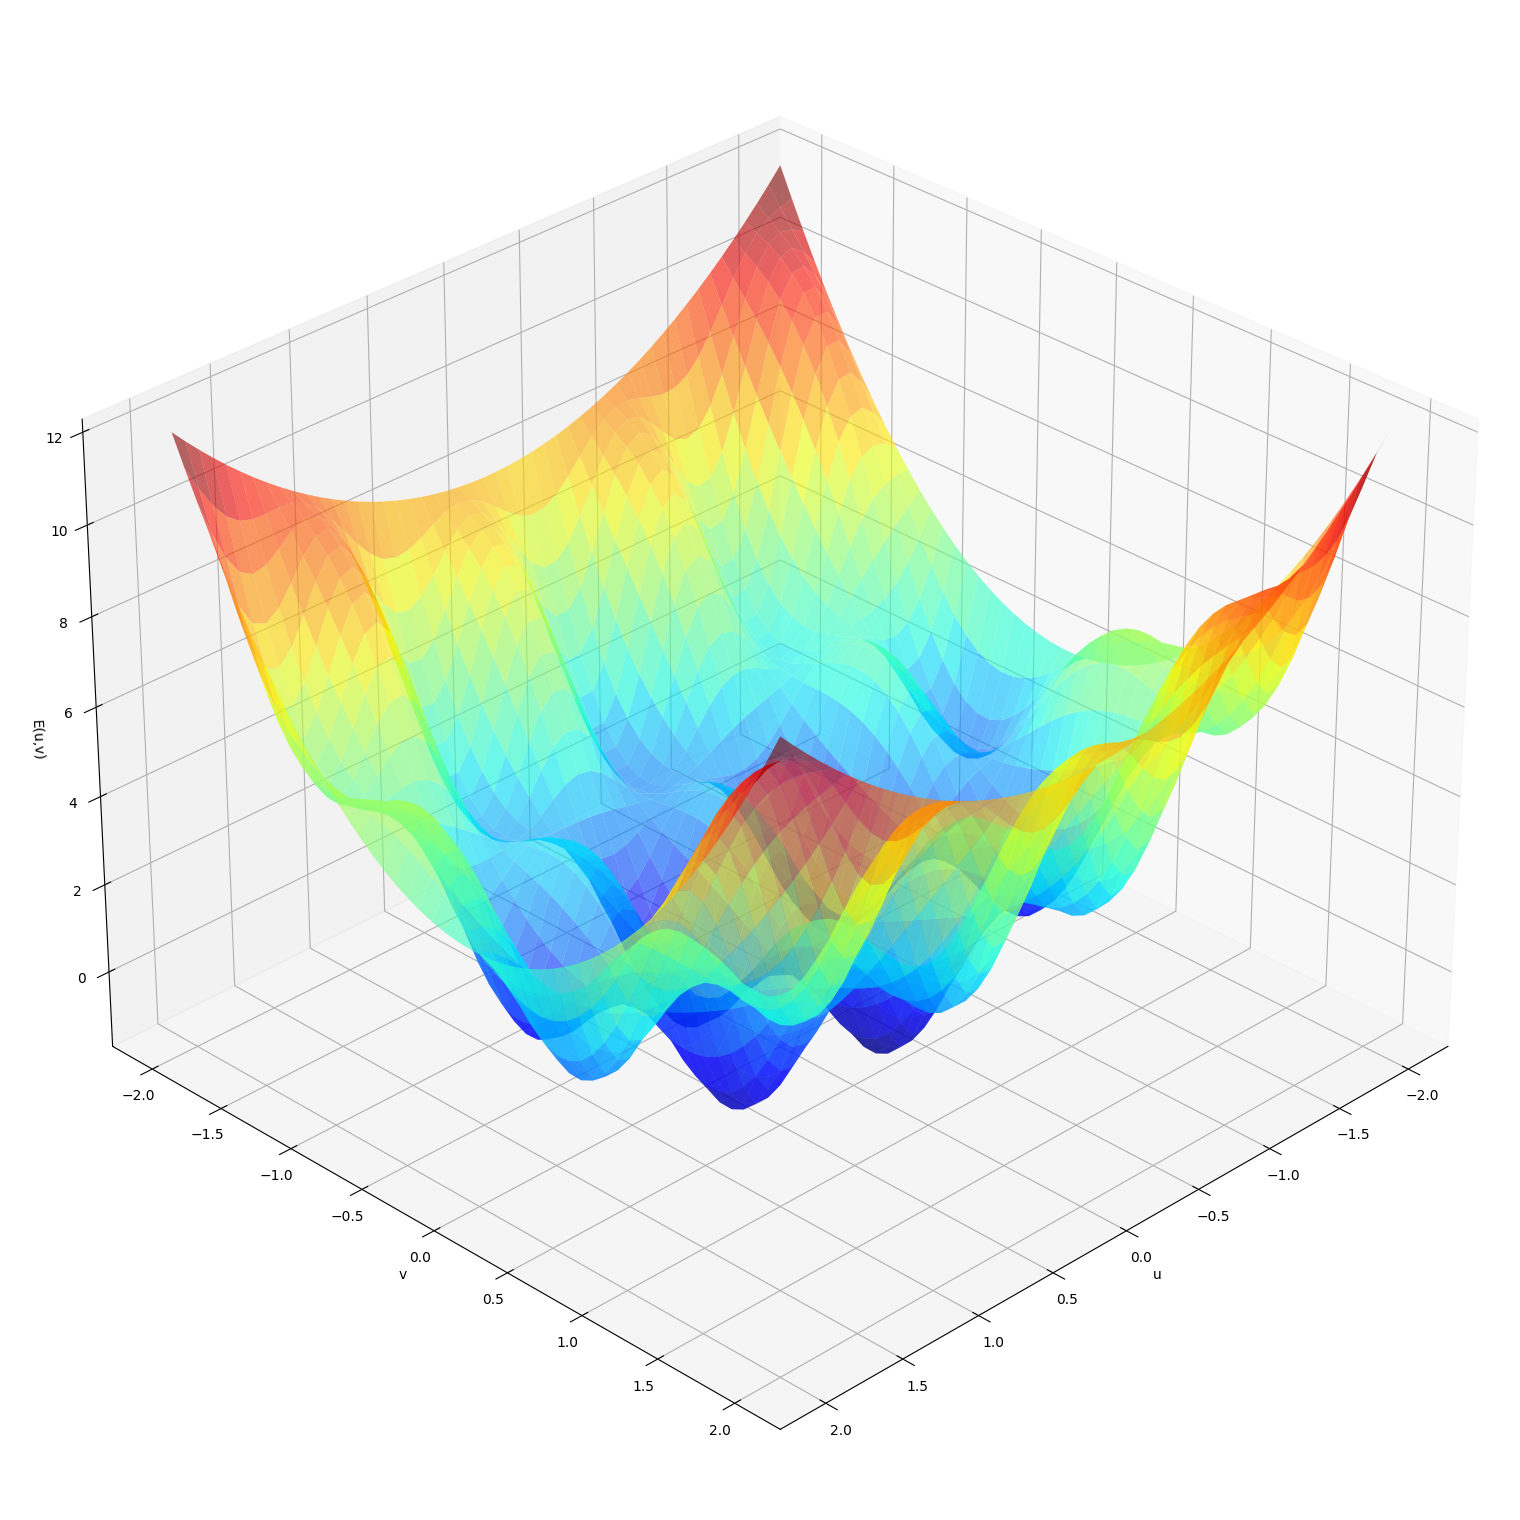

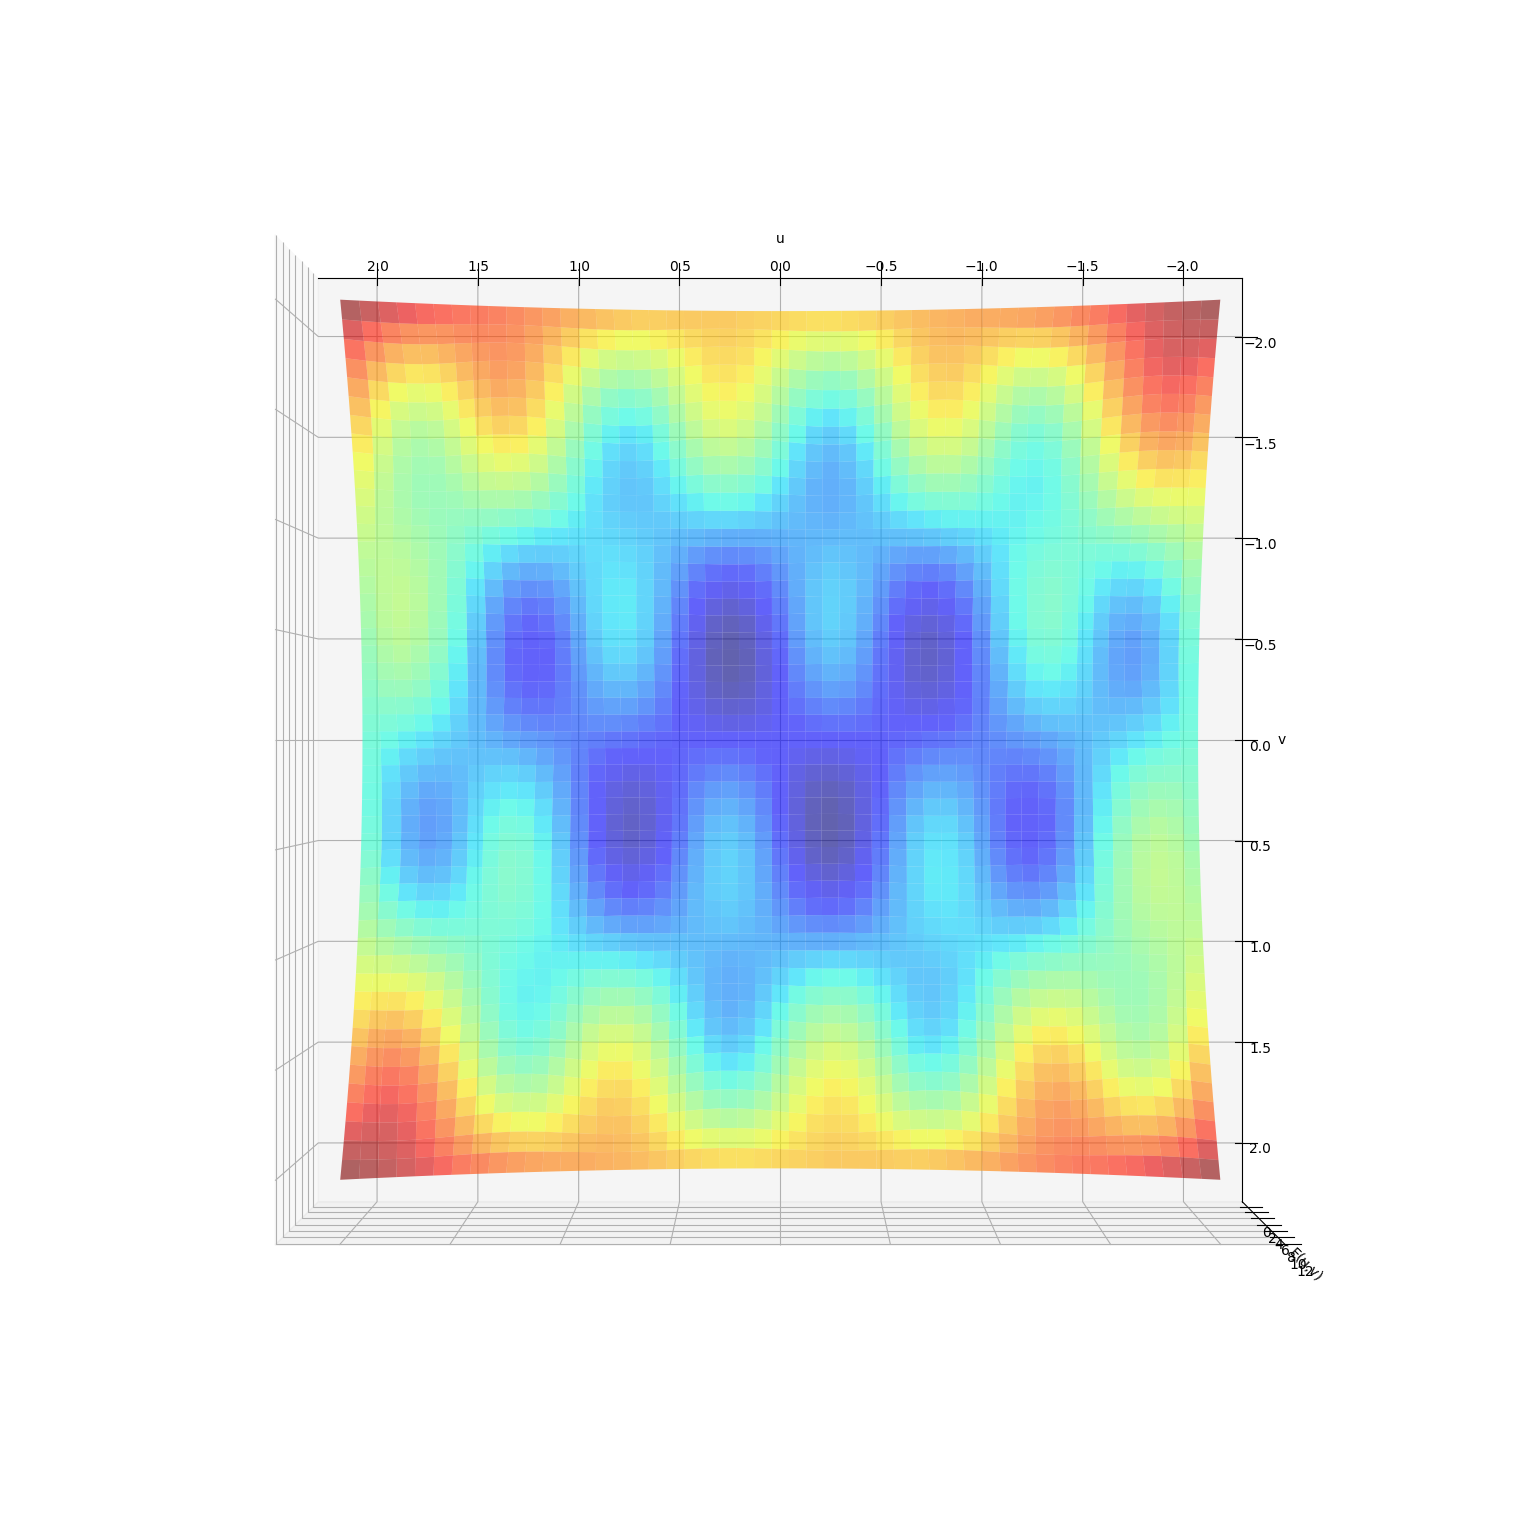

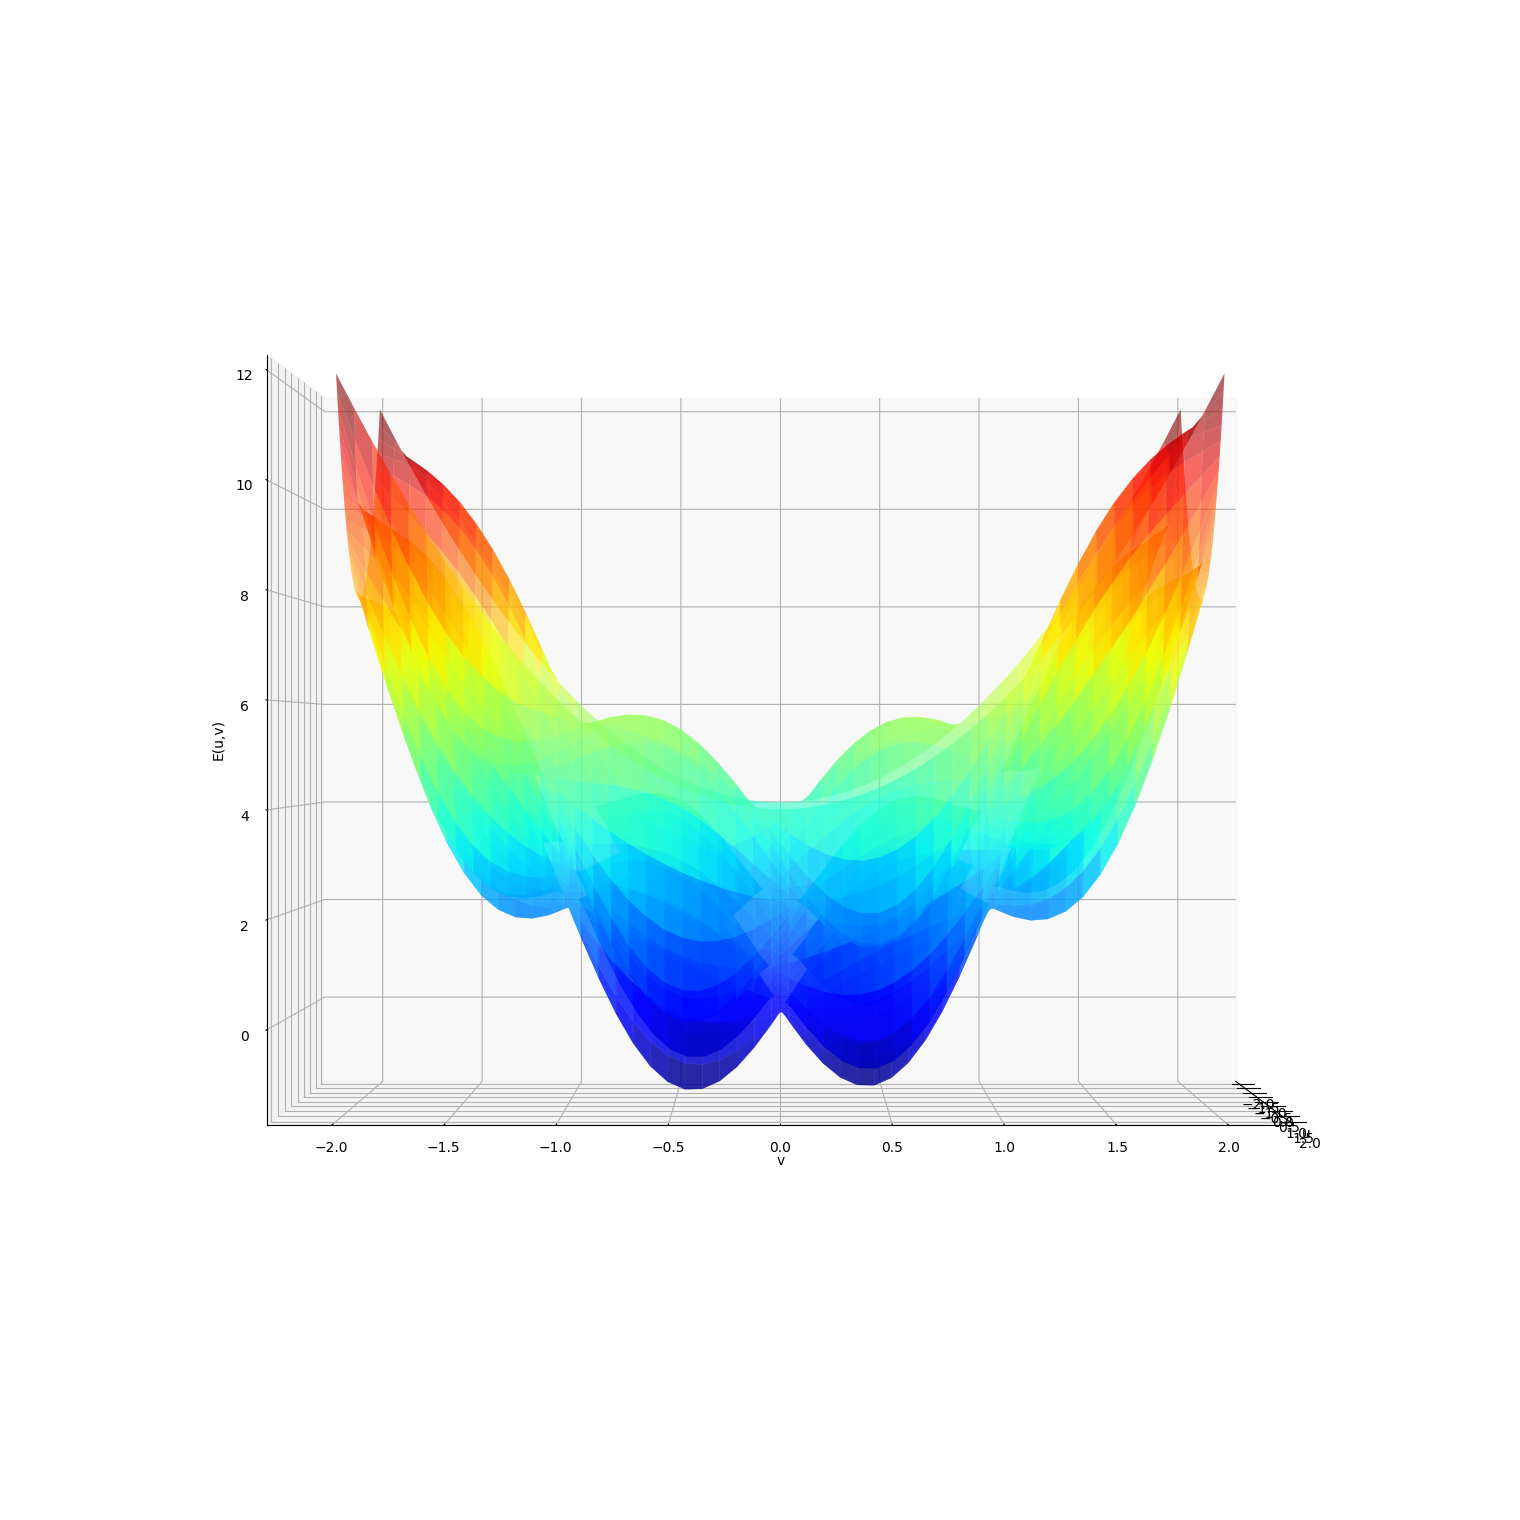

In [17]:
def E(w):
    return (w[0])**2 + 2*w[1]**2 + 2*np.sin(2*math.pi*w[0])*np.sin(math.pi*w[1])

display_figure(2, E, [],  [45,30], 'jet', [])
display_figure(2, E, [],  [90,90], 'jet', [])
display_figure(2, E, [],  [0,0], 'jet', [])
    
# Derivada parcial de E respecto de u
def Eu(w):
  return 2*w[0] + 4*math.pi*np.cos(2*math.pi*w[0])*np.sin(math.pi*w[1])

# Derivada parcial de E respecto de v
def Ev(w):
  return 4*w[1] + 2*math.pi*np.sin(2*math.pi*w[0])*np.cos(math.pi*w[1])
    
# Gradiente de E
def gradE(w):
    return np.array([Eu(w), Ev(w)])

#### <font color='blue'>b) Emplear gradiente descendente para minimizar esta función con distintos valores de learning rate ($\eta$). 
Usar como punto inicial $(-1, 1)$, tasa de aprendizaje $\eta = 0.01$ y un máximo de $100$ iteraciones. Generar un gráfico 2D que muestre cómo desciende el valor de la función (eje $Y$) con las iteraciones (eje $X$). </font>



Grafica con learning rate igual a 0.01
w = [-1.21775622  0.41341212]
fun(w) = -0.06230891024214413


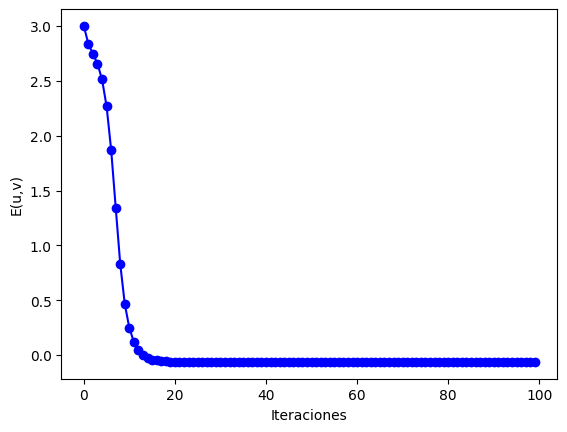

In [18]:
'''
Nueva versión del gradiente descendente en donde no se usa un epsilon como termination criterion.
En esta ocasión, el algoritmo se ejecuta siempre por un número máximo determinado de iteraciones. 
Junto con ello, se guardan los valores de la función en cada iteración del algoritmo. Y, finalmente, 
realiza la visualización de dichos valores en 2D. 

El alumnado, si lo prefiere, puede implementar una única función de descenso de gradiente que, 
dados los parámetros adecuados, realice esta visualización directamente. Es decir, no es obligatorio
implementar dos funciones de descenso de gradiente. 
'''
def gd_grafica(w, lr, grad_fun, fun, max_iters = 100):
    graf = [fun(w)]
    for k in range(1,max_iters):
        # Calculo el gradienet de la función
        grad = grad_fun(w)
        # Actualizacio de los pesos en la dirección opuesta al gradiente
        w -= lr*grad
        # Guardo el valor de la función
        graf.append(fun(w))

    print('w =', w)    
    print('fun(w) =', fun(w))
    plt.figure()
    plt.plot(range(0,max_iters), graf, '-bo')
    plt.xlabel('Iteraciones')
    plt.ylabel('E(u,v)')
    plt.show()   

print ('\nGrafica con learning rate igual a 0.01')
gd_grafica(np.array([-1.0,1.0]) , 0.01, gradE, E)


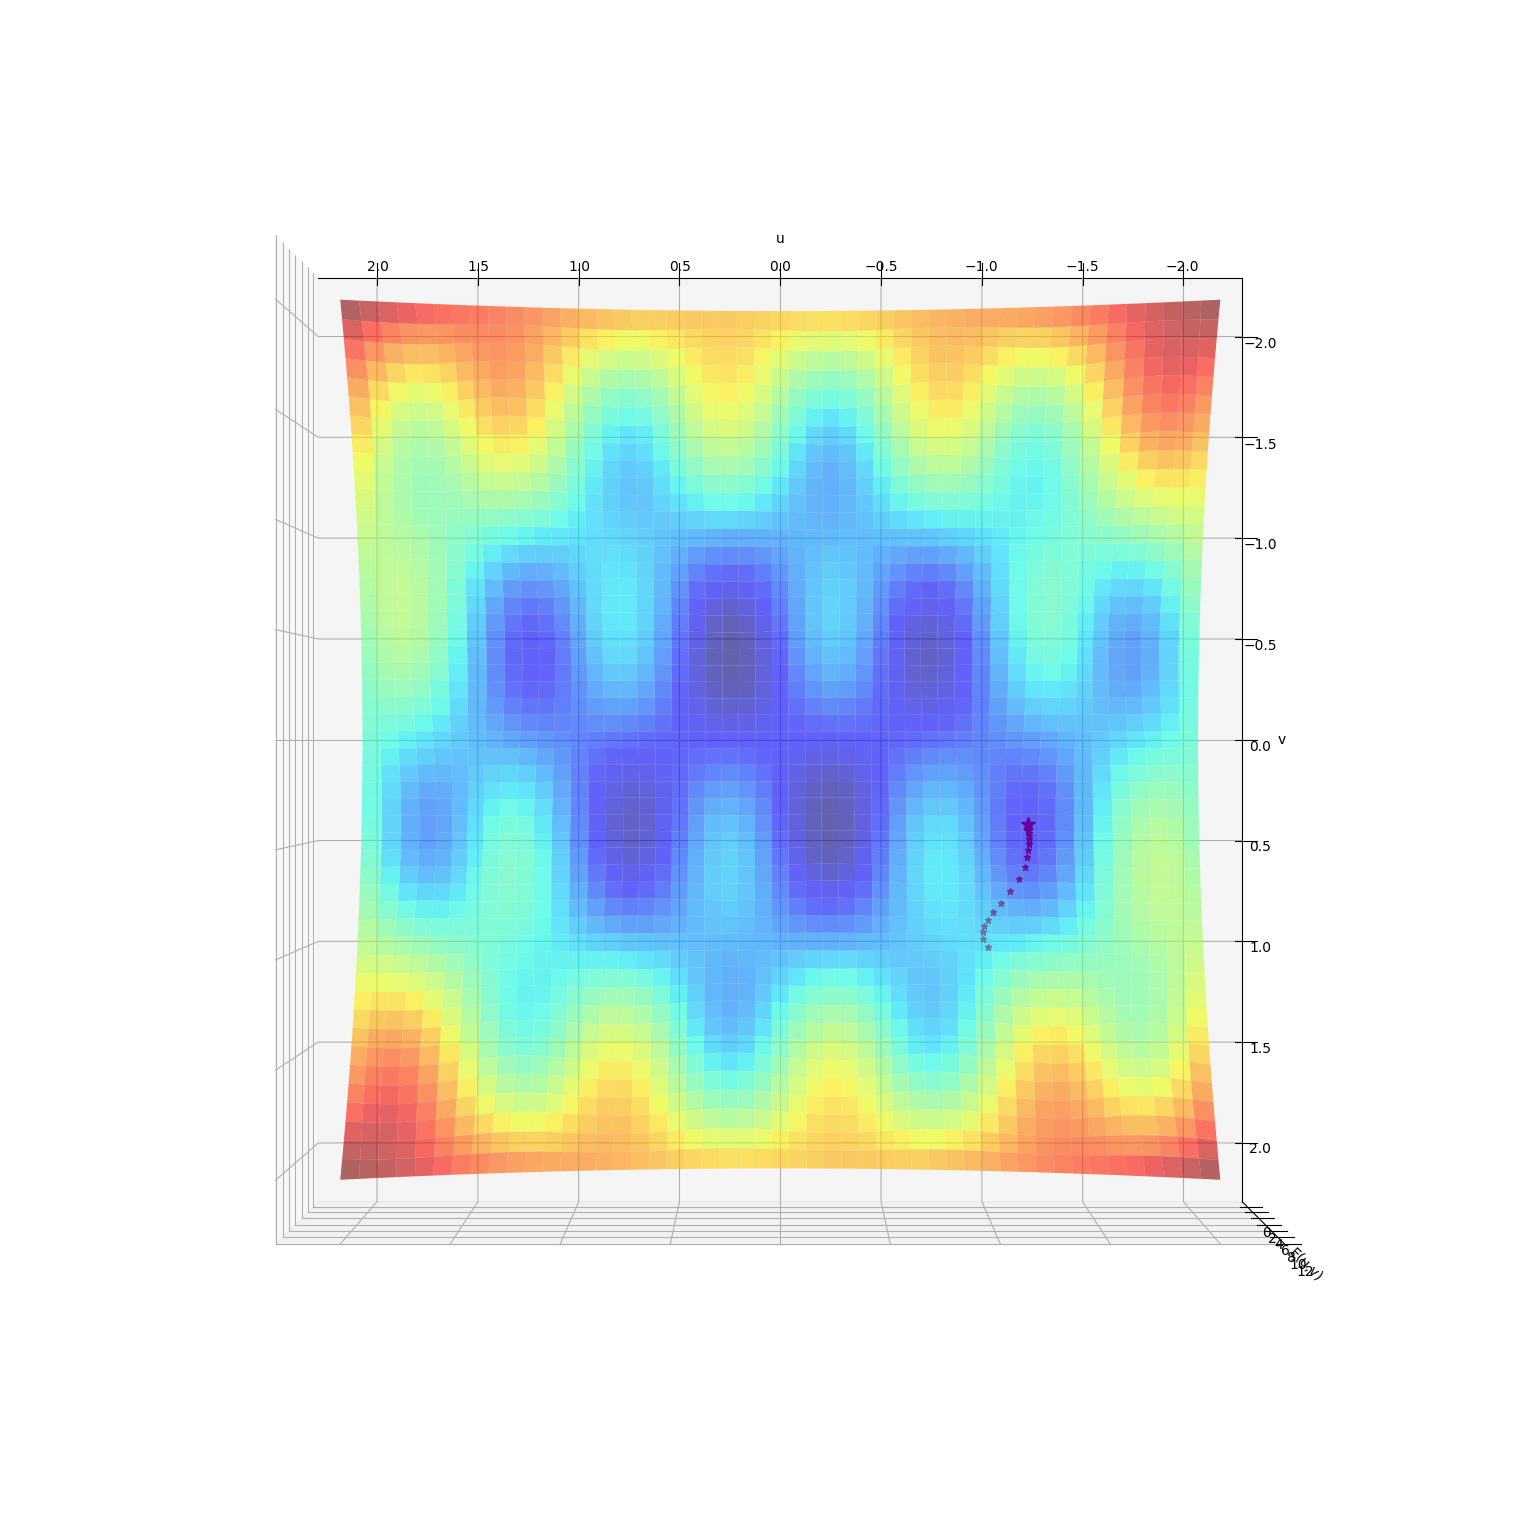

In [19]:
w, k, ws = gd(np.array([-1.0,1.0]), 0.01, gradE, E, float('-inf'), max_iters = 100, show_evol = False)
display_figure(2, E, ws, [90,90], 'jet','')

> Viendo la gráfica y los valores obtenidos podemos observar la desventaja de usar el método gradiente descendente y es, que no tener un buen punto de partida provoca que el método no encuentre el mínimo global, sino que acaba 'encerrado' en un óptimo local.

<font color='blue'>Repetir el experimento pero usando $\eta = 0.1$, comentar las diferencias y su dependencia de $\eta$.</font>


Grafica con learning rate igual a 0.1
w = [ 0.11131064 -0.00237237]
fun(w) = 0.002805657285235335


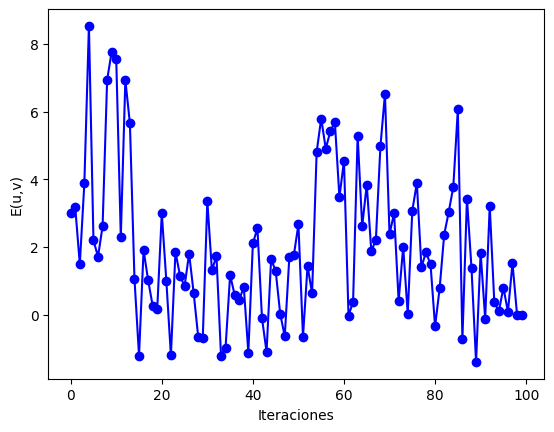

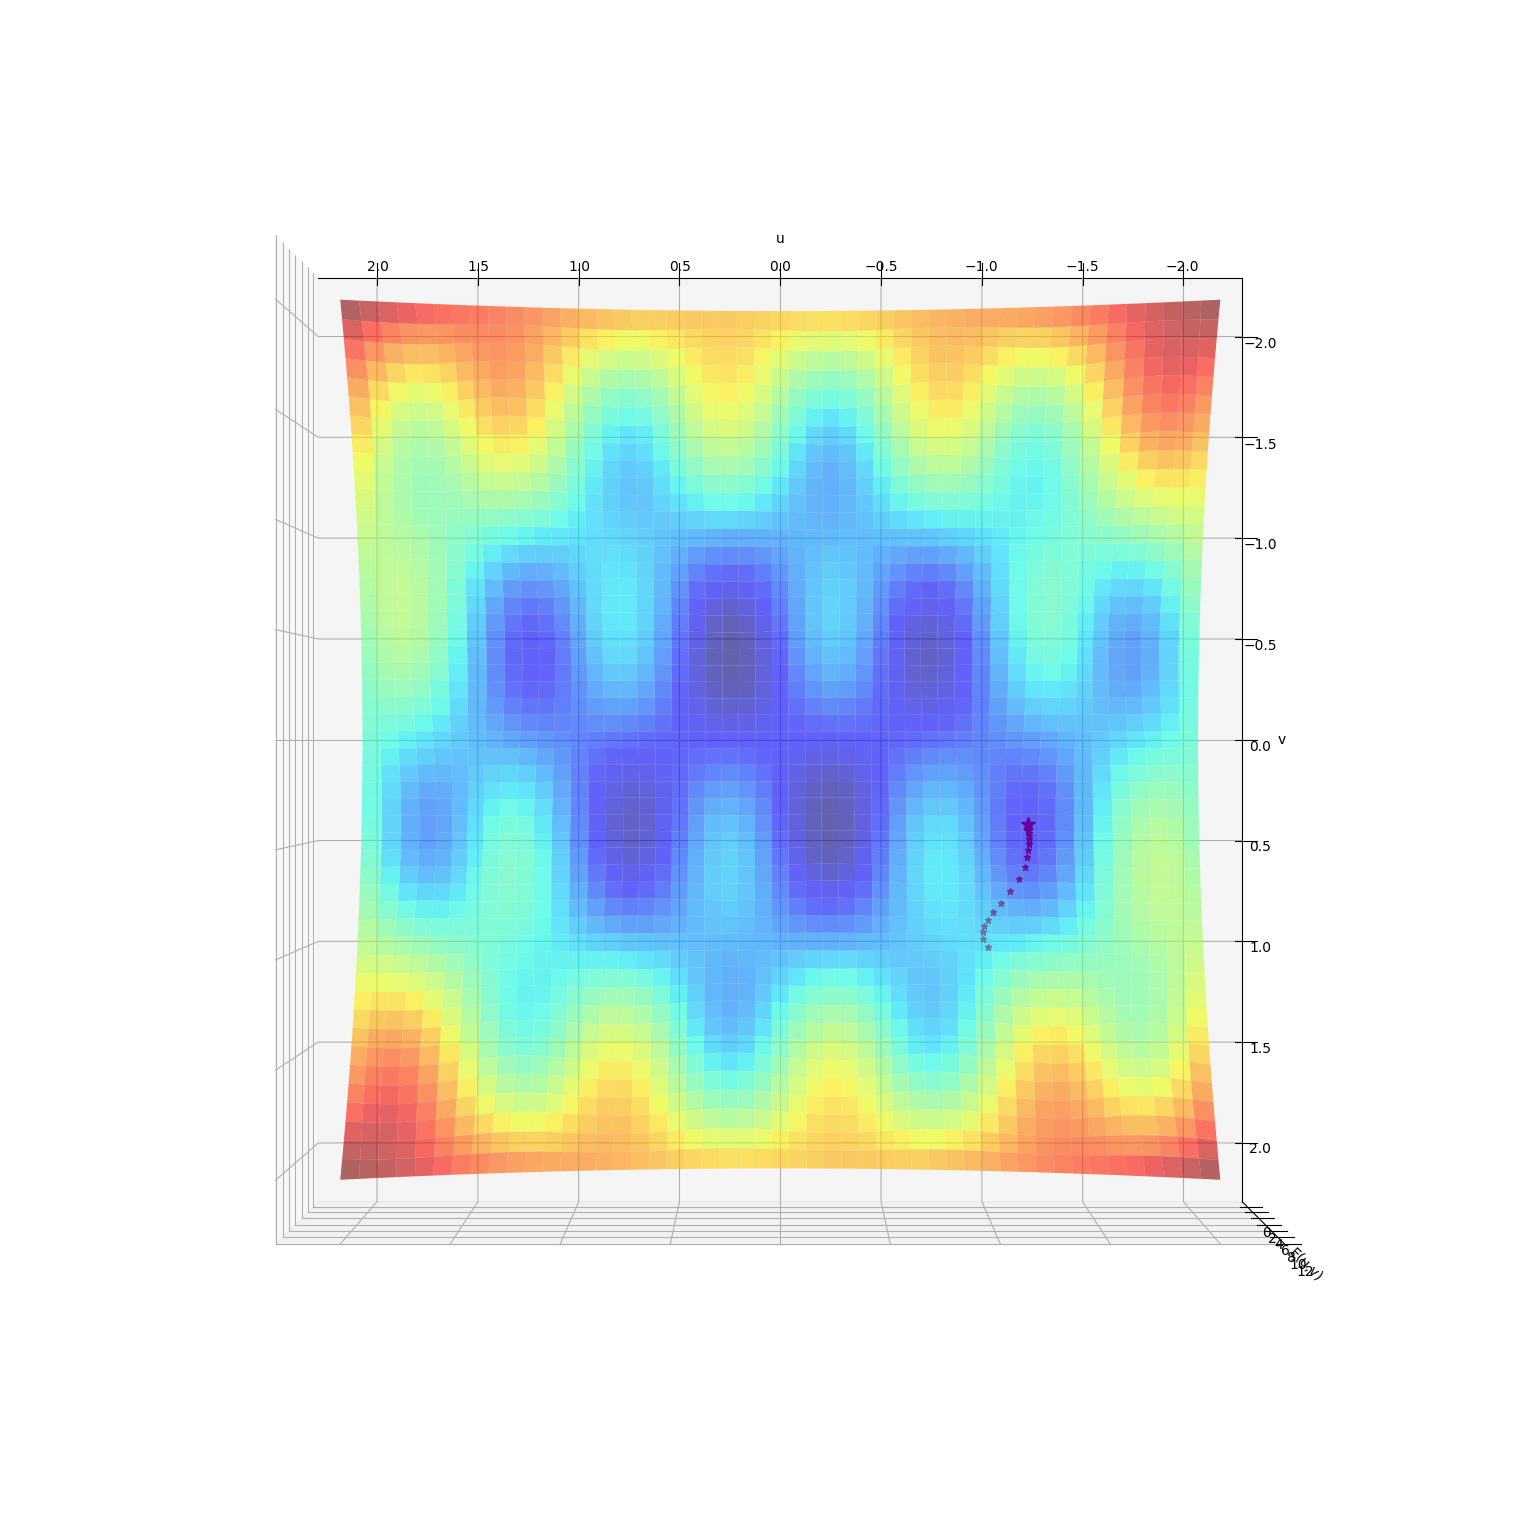

In [20]:
print ('\nGrafica con learning rate igual a 0.1')
gd_grafica(np.array([-1.0,1.0]) , 0.1, gradE, E)
display_figure(2, E, ws, [90,90], 'jet','')

> Al realizar ahora la búsqueda con un learning rate mayor podemos observar que el resultado obtenido es peor puesto que el método avanza demasiado rápido y no puede acercarse al mínimo que buscamos. Además, al usar el mismo punto de partida, volvemos a vernos atrapados en un mínimo local.

### <font color='blue'>(2 puntos) Influencia del punto inicial y del learning rate. 

Considérese ahora la función $E(u,v) = -cos(u) \cdot cos(v) \cdot e^{(-((u \cdot \pi)^2 + (u + \pi)^2))}$. Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.</font>




Las derivadas parciales de la función $E(u,v)$ respecto a sus dos variables son las siguientes:

$\frac{\partial}{\partial u} E(u,v) = cos(u) \cdot e^{\pi^2 u^2 - u^2 - 2\pi - \pi^2} \cdot cos(u) \cdot (2\pi^2u -2u -2\pi) \cdot e^{\pi^2 u^2 - u^2 - 2\pi - \pi^2} \cdot sin(u)$

$\frac{\partial}{\partial v} E(u,v) = e^{\pi^2 u^2 - u^2 - 2\pi - \pi^2} \cdot cos(u) \cdot sin(v)$


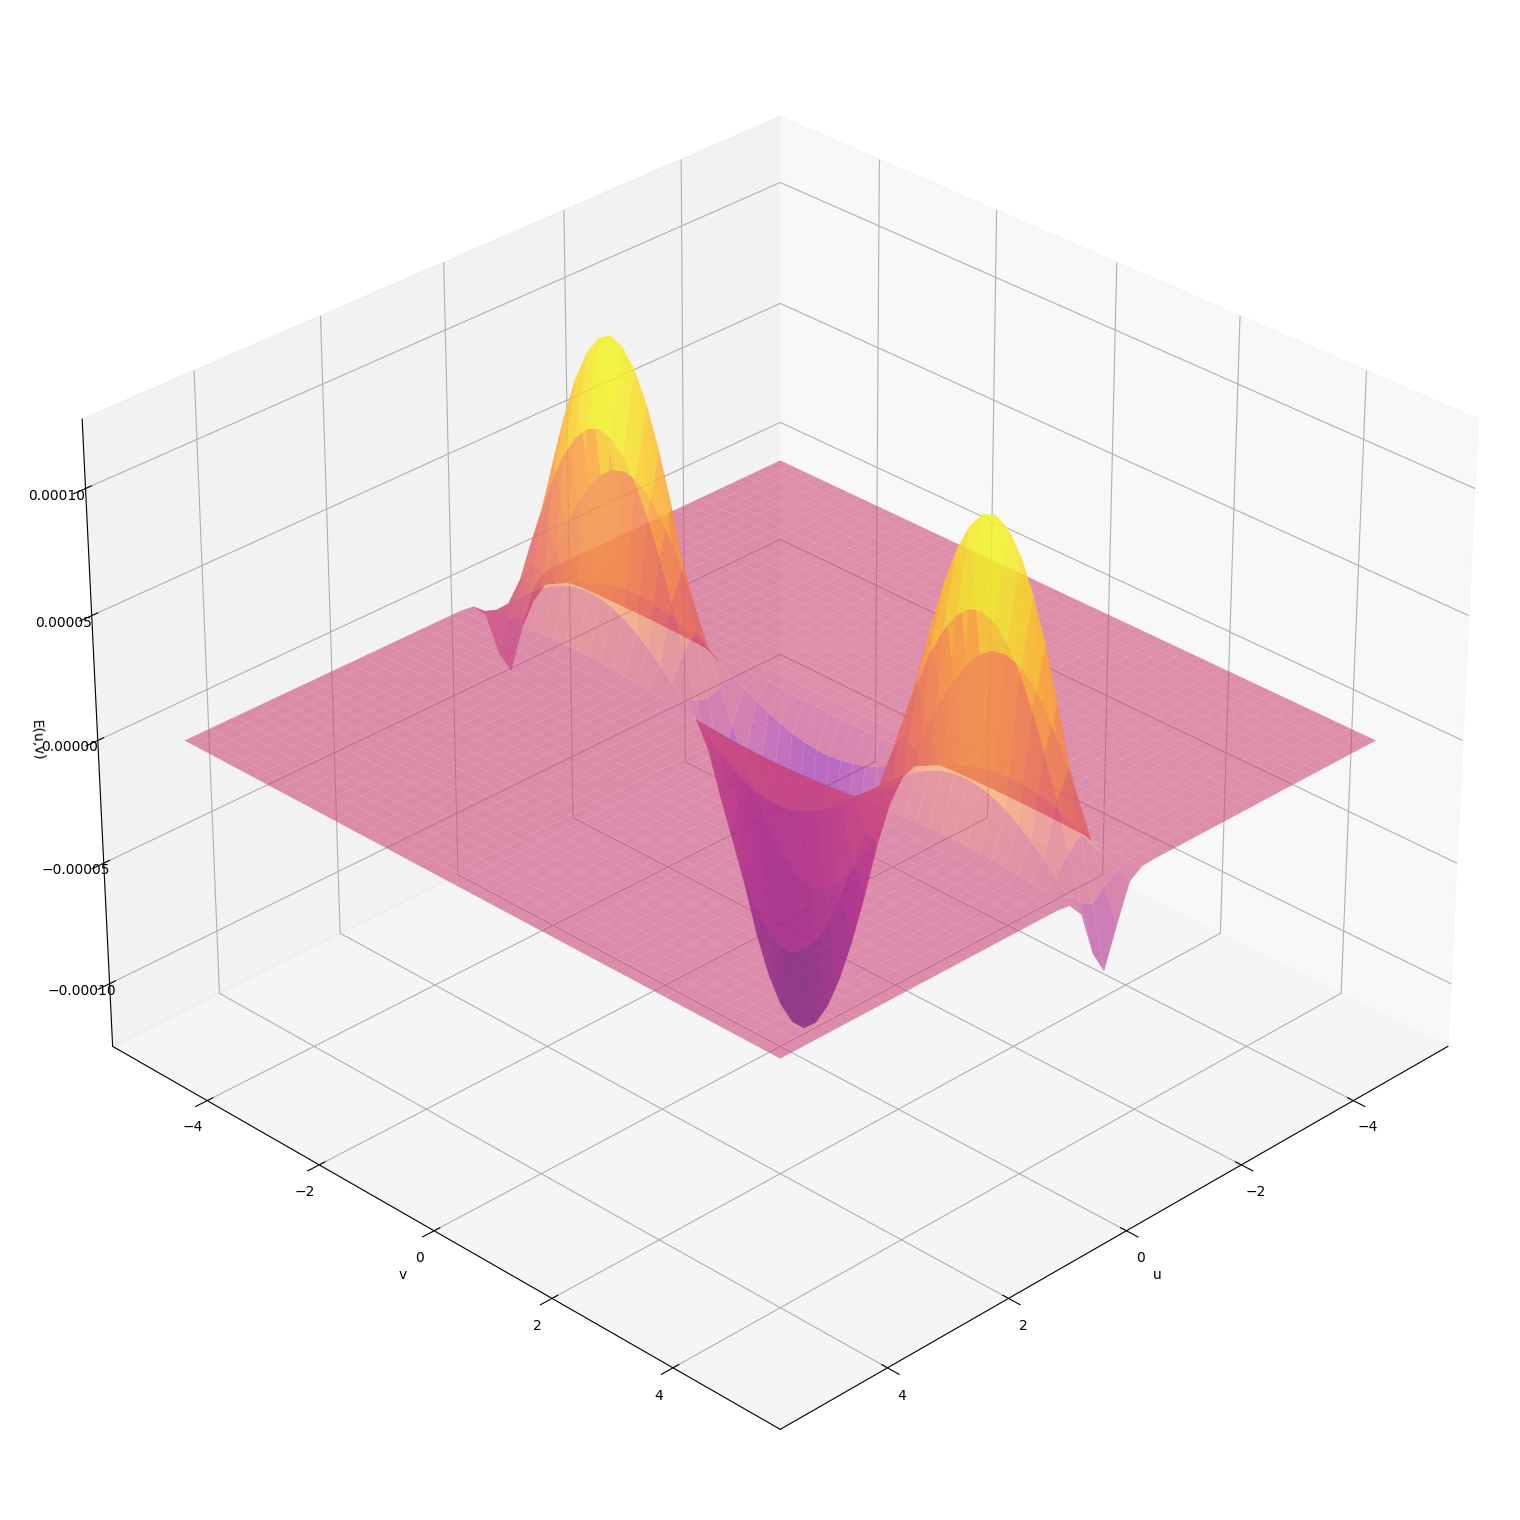

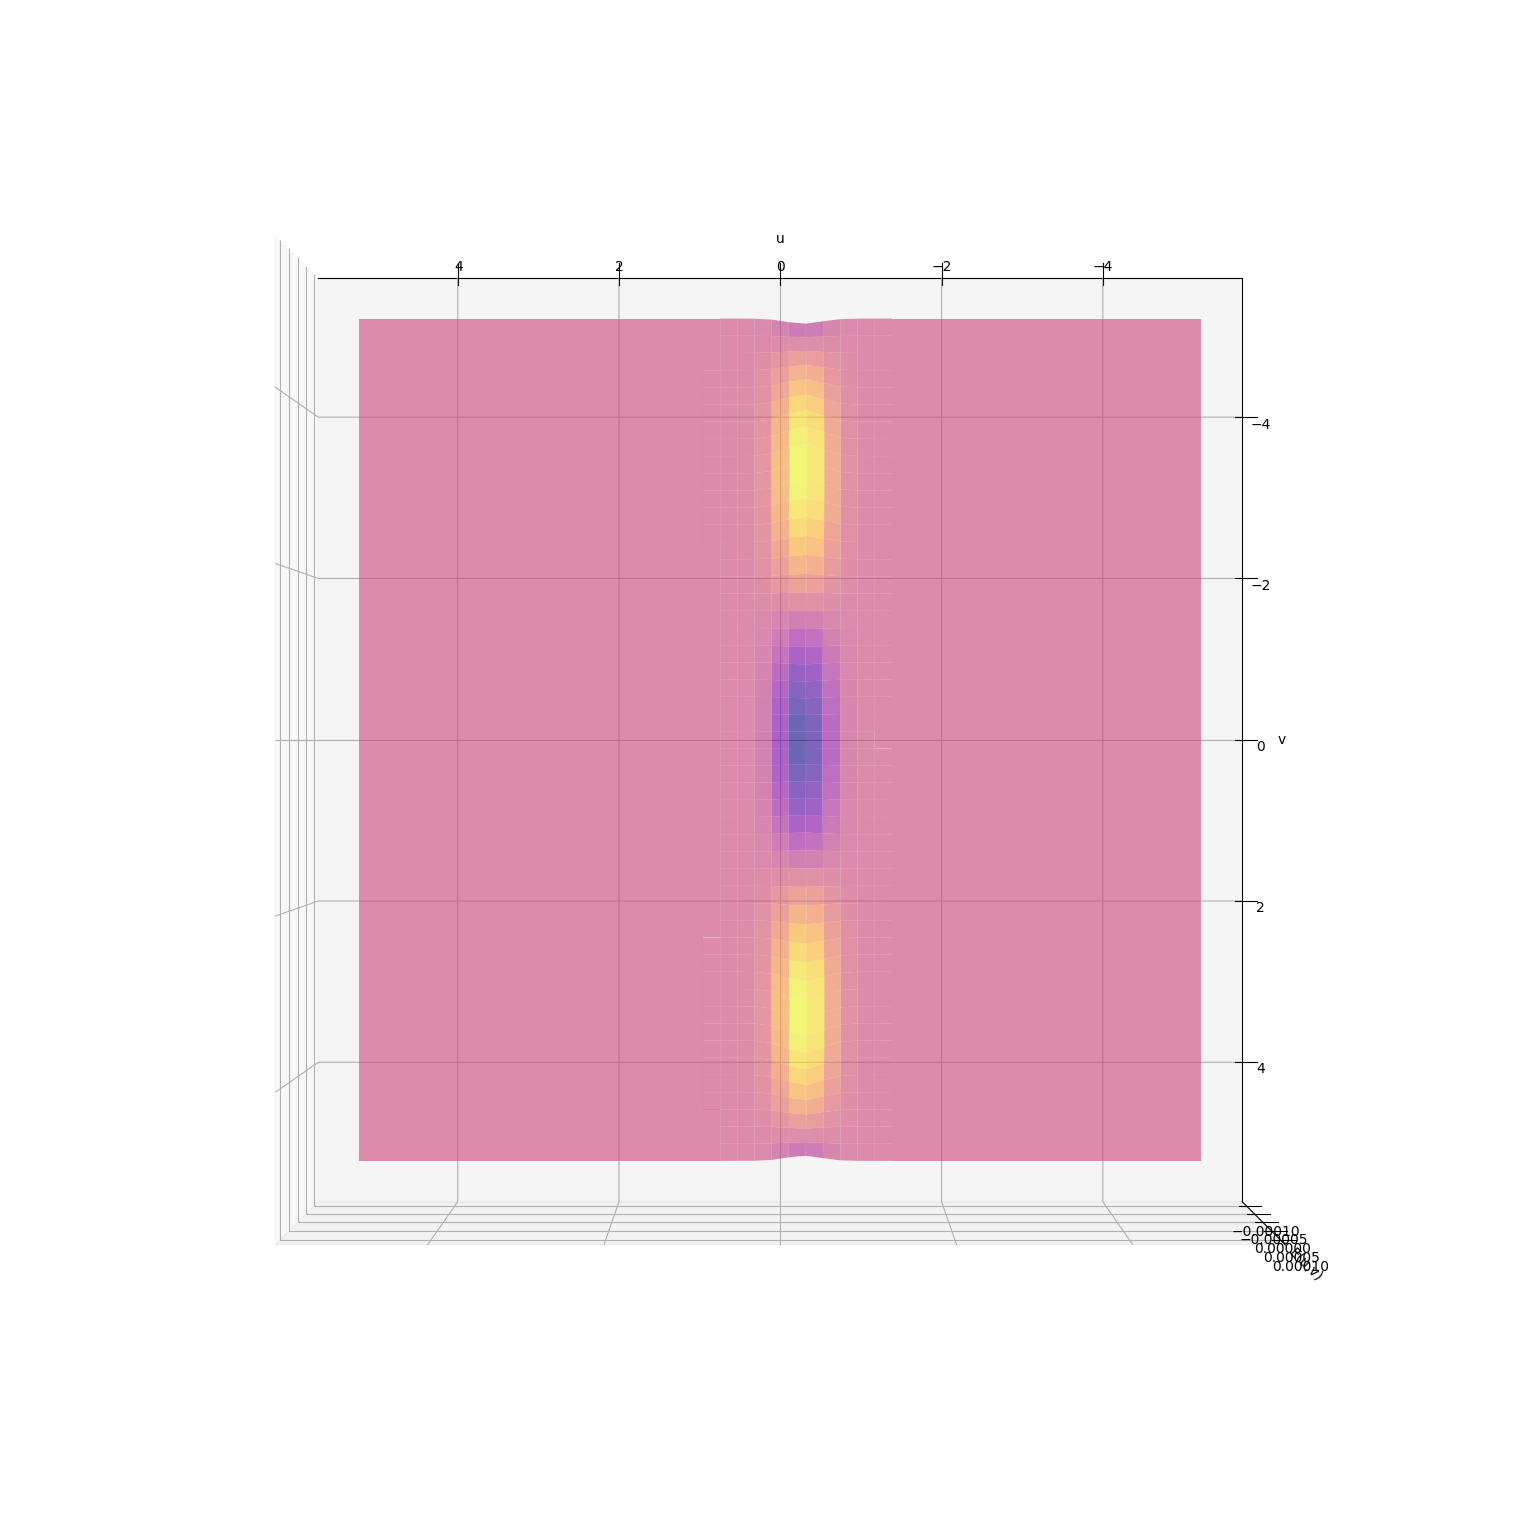

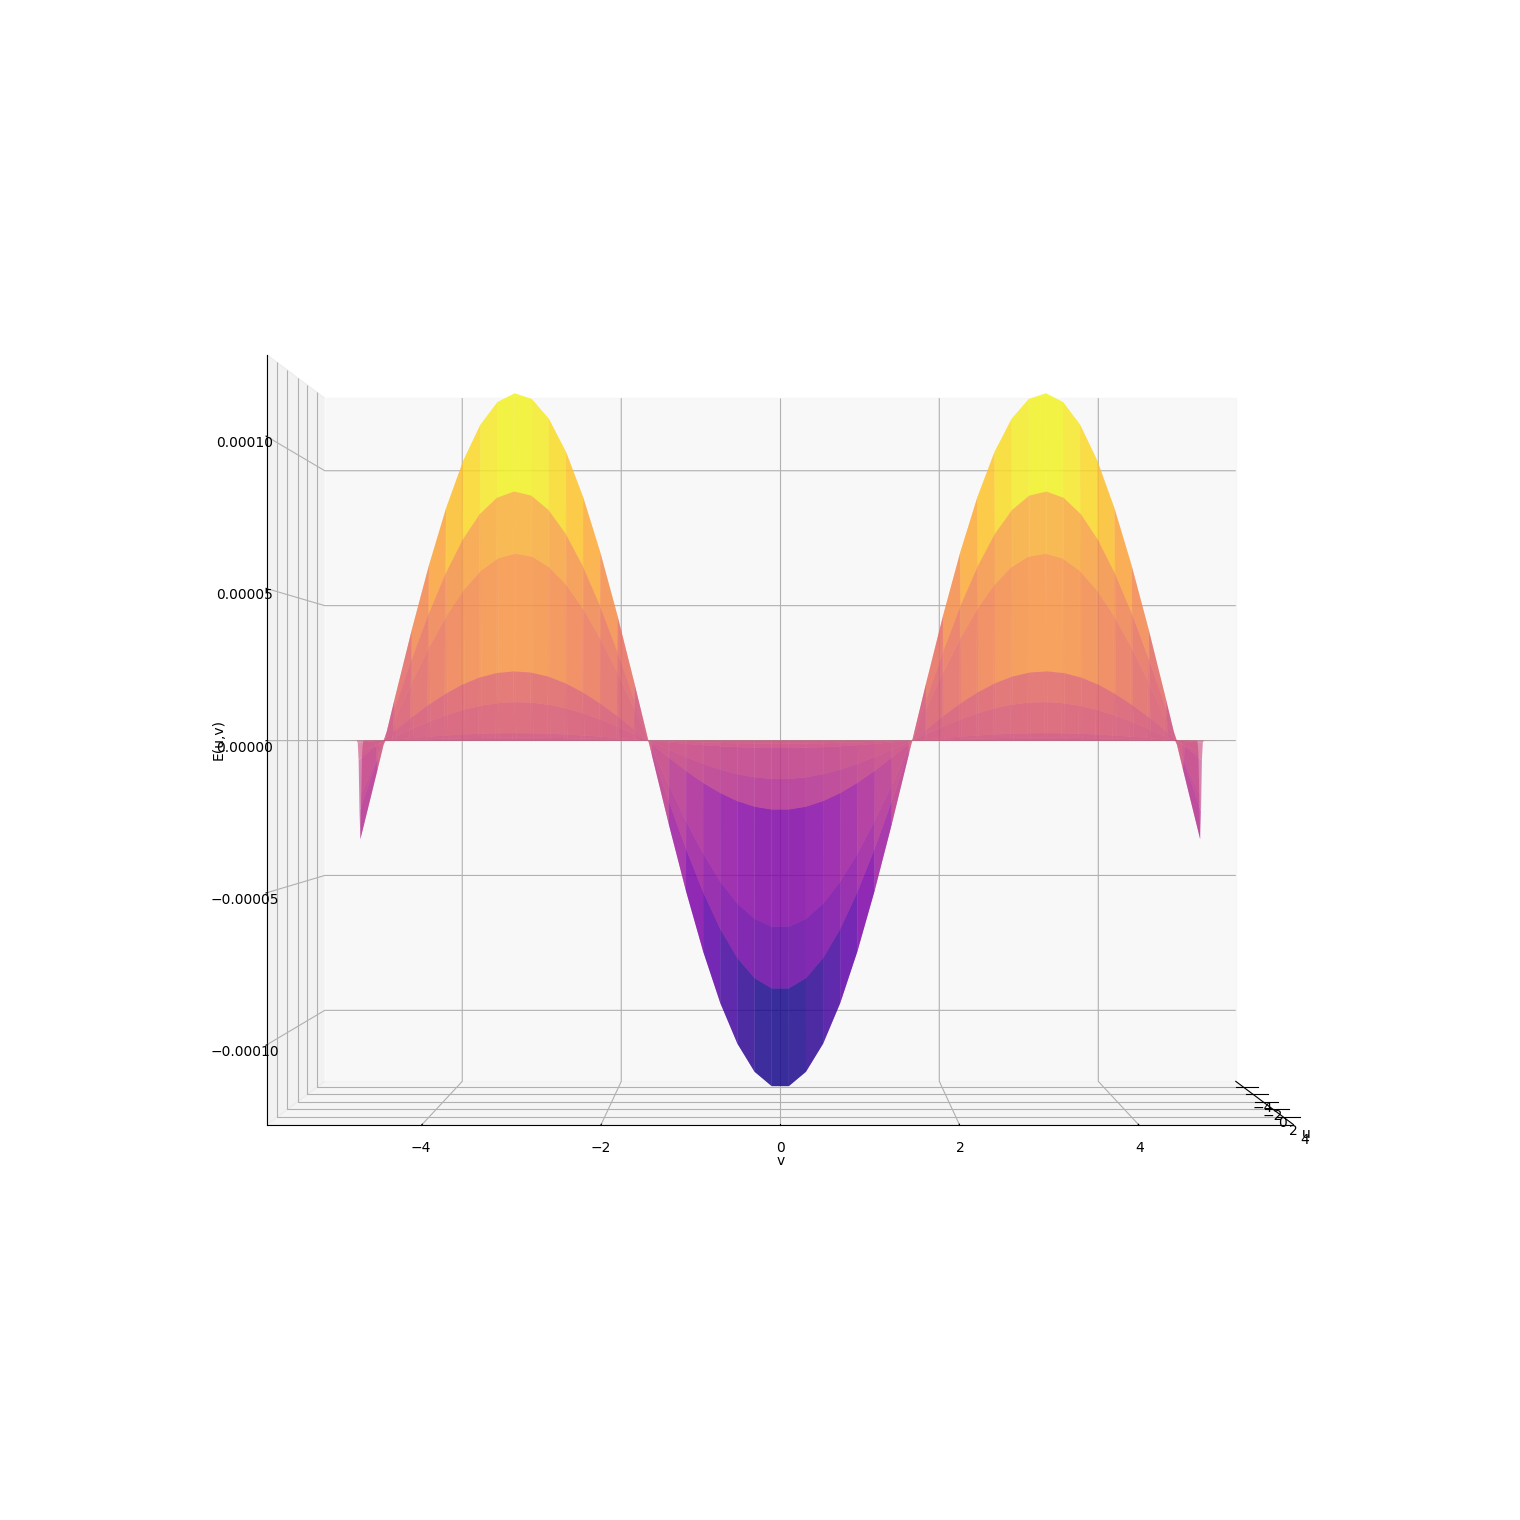

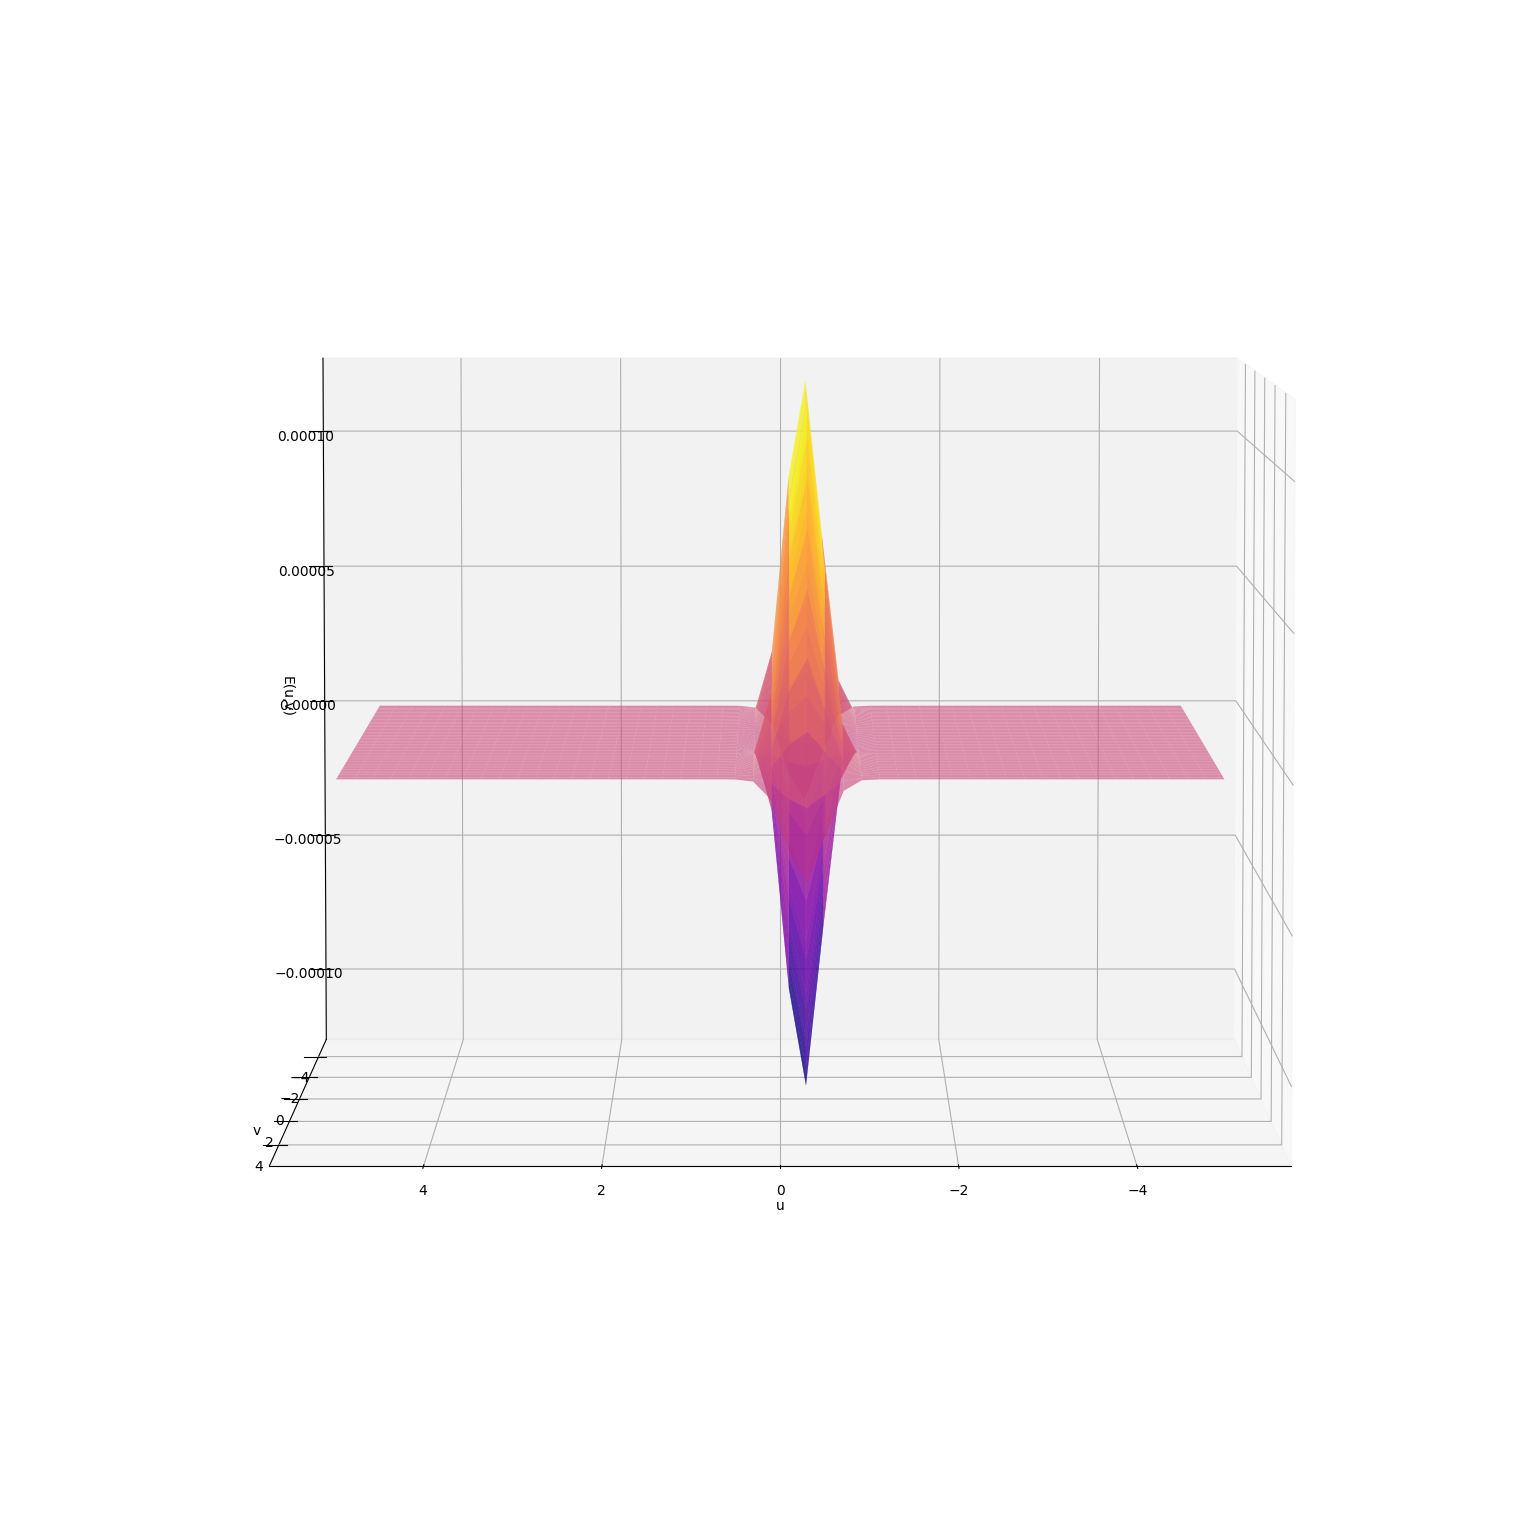

In [21]:
np.random.seed(1)

def E(w): 
    return -np.cos(w[0]) * np.cos(w[1]) * np.exp(-((w[0] * math.pi)**2 + (w[0] + math.pi)**2))
             
# Derivada parcial de E respecto de u
def Eu(w): #calculo el exponente y un parentesis de la función aparte para mayor claridad
    exponente = -math.pi**2 * w[0]**2 - w[0]**2 - 2*math.pi*w[0] - math.pi**2
    aux = -2*math.pi**2*w[0] - 2*w[0] -2*math.pi
    return -np.cos(w[1])*(np.exp(exponente) * np.cos(w[0]) * aux * np.exp(exponente) * np.sin(w[0]))

# Derivada parcial de E respecto de v
def Ev(w):
    exponente = -math.pi**2 * w[0]**2 - w[0]**2 - 2*math.pi*w[0] - math.pi**2
    return np.exp(exponente) * np.cos(w[0]) * np.sin(w[1]) 
    
# Gradiente de E
def gradE(w):
    return np.array([Eu(w), Ev(w)])

display_figure(5, E, [], [45,30], 'plasma','')
display_figure(5, E, [], [90,90], 'plasma','')
display_figure(5, E, [], [0,0], 'plasma','')
display_figure(5, E, [], [90,5], 'plasma','')

<font color='blue'>Úsese el gradiente descendente para encontrar un mínimo de esta función, comenzando desde los siguientes puntos iniciales: $(-4.0, 4.0), (-0.2,-3.0), (0.4,0.0), (-0.25,-2.0)$, usando dos tasas de aprendizaje ($0.1$ y $0.01$), y un número máximo de iteraciones de $250.000$. Debe mostrarse una tabla que asocie puntos iniciales y tasas de aprendizaje con las coordenadas alcanzadas y el valor de la función en dichos puntos finales. </font>

In [41]:
# Defino las dos tasas de aprendizaje
lr1 = 0.1
lr2 = 0.01

# Defin0 los puntos iniciales
inicial = np.array([[-4.0,4.0], [-0.2,-3.0], [0.4,0.0], [-0.25,-2.0]])
resultados = []
# Voy recorriendo los puntos iniciales y calculando el gradiente para ambas tasas de aprendizaje
for w_ini in inicial:
    w1, n_iter1, ws = gd(w_ini, lr1, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
    w2, n_iter2, ws = gd(w_ini, lr2, gradE, E, float('-inf'), max_iters=250000, show_evol = False)
    resultados.append([w_ini, w1, w2])

# Creo una tabla con los resultados
df = pd.DataFrame(resultados, columns=['Punto inicial', 'Solución con lr=0.1', 'Solución con lr=0.01'])

print(df)

   Punto inicial                           Solución con lr=0.1  \
0    [-4.0, 4.0]                                   [-4.0, 4.0]   
1   [-0.2, -3.0]   [-0.20008730996284108, -1.3362341796596708]   
2     [0.4, 0.0]                    [0.39999992723875855, 0.0]   
3  [-0.25, -2.0]  [-0.24995154177594514, -0.14646825940146074]   

                         Solución con lr=0.01  
0                                 [-4.0, 4.0]  
1   [-0.20001286448589595, -2.95293520953456]  
2                   [0.3999999927280392, 0.0]  
3  [-0.25000226782010704, -1.707853490199792]  


> Observando como funciona el método en dicha función podemos analizar la importancia de ambos valores. 

### <font>Punto incial</font>

En cuanto a la importancia del punto inicial podemos observar que es crucial, el método de gradiente descendente necesia que la función tenga pendiente, es decir, que la derivada en el punto que estudiamos sea diferente de cero. Esta función cumple dicho comportamiento cuando tomamos como punto inicial el (-4, 4), la derivada de la función en dicho punto es nula por lo que nuestro método no puede avanzar y queda atrapado en el punto inicial hasta cumplir el número máximo de iteraciones.

En conclusión, dicho punto depende únicamente de la función que estemos evaluando por lo que la mejor forma de escoger un punto inicial correcto es conociendo dicha función. Si por otra parte, desconocemos esta información, una buena práctica puede ser generar varios puntos aleatorios distribuidos por el dominio de la función, evaluar nuestro método en cada uno de estos puntos con pocas iteraciones, sólo para comprobar que no estamos en un punto sin pendiente o que nos encontramos en un óptimo local y, a continuación, ejecutar nuestro algoritmo al completo en el punto inicial más favorable.

### <font>Learning rate</font>

También debemos elegir un correcto learning rate pues será crucial en la manera en la que nuestro algoritmo desciede por la pendiente de la función hacia el mínimo detectado. Una tasa de aprendizaje demasiado grande puede avanzar rápidamente al inicio del método pero al acercarse al mínimo, puede no llegar a encontrarlo debido a la gran magnitud de avance en cada iteración. Por otra parte elegir un learning rate debería darnos mayor exactitud al encontrar en mínimo. Sin embargo, una tasa demasiado pequeña puede ser también un problema puesto que si nuestro punto inicial se encuentra alejado del óptimo de la función, nuestro algoritmo finalizará al llegar a su número máximo de iteraciones sin haber llegado al resultado correcto. 

Viendo los resultados obtenidos en dicha práctica, podemos llegar a la conclusión que una tasa de aprendizaje correcta puede ser igual a 0.01, puesto que en todos los casos logra el objetivo buscado al igual que con 0.1, pero alcanzando mayor precisión.



### <font color='blue'>(1 punto) ¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo global de una función arbitraria?</font>

La mayor dificultad es la elección del punto inicial en base al desconocimiento de la función que estamos evaluando. 
Como hemos comentado anteriormente, si escogemos un punto incial correcto podemos estar en un punto con pendiente nula o en el que nuestro algoritmo nos lleve hacia un óptimo local en lugar de al óptimo global. Este caso es un verdadero problema puesto que podemos pensar que el mínimo global de la función se encuentra en el punto que hemos encontrado mientras que no lo sea y haya partes del dominio de la función con valores mucho menores. Imaginémonos que estamos estamos evaluándo la gráfica del valor en bolsa de nuestra empresa, pensar que hemos encontrado el mínimo global cuando no es así podría llevarnos a la quiebra.
Otra dificultad puede ser el valor de la tasa de aprendizaje aunque en base a mi experiencia al realizar esta práctica no es tan crucial como lo es el punto de partida puesto que utilizando valores intermedios (0.1 - 0.01) podemos llegar a puntos similares.

## <font color='blue'>Ejercicio 2: REGRESIÓN LINEAL (5.5 puntos) </font>

### <font color='blue'>(2.5 puntos) Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de imágenes de dígitos manuscritos. 

<font color='blue'>En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán para este ejercicio las imágenes de los números $1$ y $5$. </font>

<font color='blue'>Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo
de la pseudo-inversa como el gradiente descendente estocástico (SGD). La pseudo-inversa debe ser calculada por medio de la descomposición en valores singulares vista en teoría (esto es, debe emplearse la función `np.linalg.svd()`). Las etiquetas serán
$\{-1,1\}$, una para cada uno de los números. Se deben dibujar las soluciones obtenidas
junto con los datos usados en el ajuste (tanto con los datos de entrenamiento como con los de test). Valorar la bondad del resultado usando $E_{in}$ y
$E_{out}$ (para $E_{out}$ calcular las predicciones usando los datos del fichero de test). Debe incluirse también el porcentaje de acierto en clasificación, tanto para los datos de entrenamiento como para los de test. </font>


In [70]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy) 
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Funcion para leer los datos
def readData(file_x, file_y, class1, class2, label_class1, label_class2):
    # Leemos los ficheros    
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []    
    # Solo guardamos los datos de las dos clases que nos interesan
    for i in range(0,datay.size):
        if datay[i] == class1 or datay[i] == class2:
            if datay[i] == class1:
                y.append(label_class1)
            else:
                y.append(label_class2)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

In [72]:
# Funcion para calcular el error
def MSE(x,y,w):
    return (1/y.size)*np.linalg.norm(x.dot(w)-y)**2

In [73]:
# Calculo del gradiente del MSE
# w = los pesos
# x = los vectores de características del minibatch
# y = el vector de etiquetas del minibatch
def gradMSE(w,x,y):
  sum = np.sum( (x.T*(np.dot(x, w)-y)).T,axis=0)
  sum = sum * (2/np.shape(x)[0])  
  return sum

In [85]:
class1 = 5 #dígito 5
class2 = 1 #dígito 1
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

In [75]:
# Gradiente Descendente Estocastico
np.random.seed(1)
def sgd(x, y, lr, max_iters, tam_minibatch, show_evol = False):
  # Inicializo los pesos del modelo aleatoriamente
    w = np.random.randn(x.shape[1])
    # Itero hasta alcanzar el número máximo de iteraciones
    for i in range(max_iters):
        # Selecciono un minibatch aleatorio de tamaño tam_minibatch
        indices = np.random.choice(x.shape[0], tam_minibatch, replace=False)
        x_minibatch = x[indices]
        y_minibatch = y[indices]
        # Calculo la predicción del modelo para el minibatch
        y_pred = np.dot(x_minibatch, w)
        # Calculo el gradiente del MSE para el minibatch
        grad = gradMSE(w, x_minibatch, y_minibatch)
        # Actualizo los pesos del modelo utilizando el gradiente descendente
        w -= lr * grad
    return w



[0.060169922, 0.52801953]


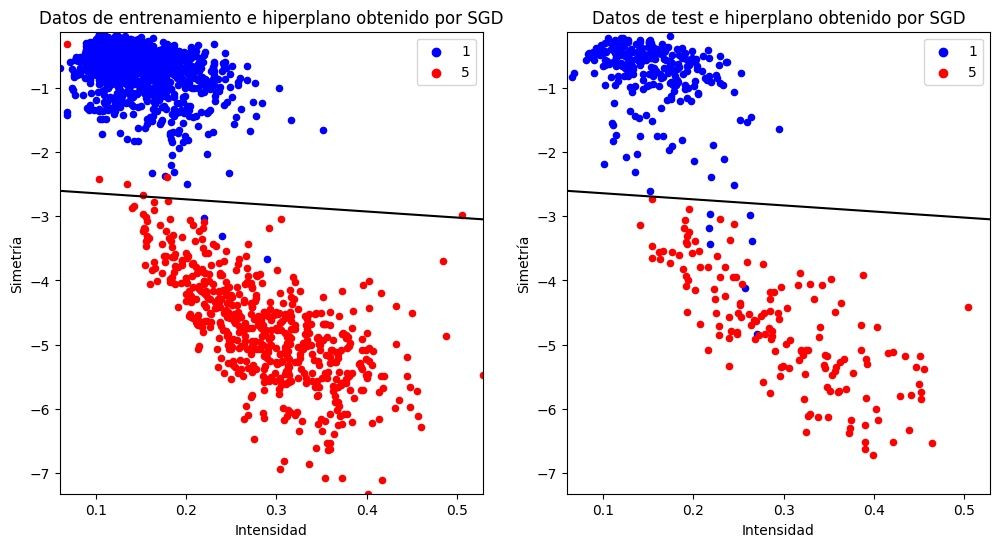


Resultados para el gradiente descendente estocástico:

Ein:  0.08102619611580227
Eout:  0.1362347087803518


In [86]:
# Ejecuto el gradiente descendente estocástico para calcular w
w = sgd(x, y, 0.01, 1000, 20)

# Creo la figura 
fig = plt.figure(figsize=(12,6))

# Declaro los colores que se asignarán al gráfico
colores = plt.cm.colors.ListedColormap(['blue', 'red'])

# Primero muestro los datos de entrenamiento
plt.subplot(1,2,1)
plt.title("Datos de entrenamiento e hiperplano obtenido por SGD")
pendiente = -w[1]/w[2]
ordenada_origen = -w[0]/w[2]

# Dibujo la línea que separa los conjuntos
x_vals = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
print([np.min(x[:, 1]), np.max(x[:, 1])])
y_vals = ordenada_origen + pendiente * x_vals
plt.plot(x_vals, y_vals, color='black')
plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])
# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
mask_blue = y == -1
mask_red = y == 1
plt.scatter(x[mask_blue, 1], x[mask_blue, 2], c='blue', s=20)
plt.scatter(x[mask_red, 1], x[mask_red, 2], c='red', s=20)
plt.legend(handles=[plt.scatter([],[], c='blue', label='1'), plt.scatter([],[], c='red', label='5')])
plt.xlabel('Intensidad')
plt.ylabel('Simetría')

# Ahora muestro los datos de test
plt.subplot(1,2,2)
plt.title("Datos de test e hiperplano obtenido por SGD")
plt.plot(x_vals, y_vals, color='black')
plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])

# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
mask_blue = y_test == -1
mask_red = y_test == 1
plt.scatter(x_test[mask_blue, 1], x_test[mask_blue, 2], c='blue', s=20)
plt.scatter(x_test[mask_red, 1], x_test[mask_red, 2], c='red', s=20)
plt.legend(handles=[plt.scatter([],[], c='blue', label='1'), plt.scatter([],[], c='red', label='5')])
plt.xlabel('Intensidad')
plt.ylabel('Simetría')

plt.show()

print ('\nResultados para el gradiente descendente estocástico:\n')
print ("Ein: ", MSE(x,y,w))
print ("Eout: ", MSE(x_test, y_test, w))

### <font>Algoritmo pseudoinversa</font>
Para calclar dicho algoritmo vamos a calcular los pesos de w multiplicando la matriz pseudoinversa de los datos (x) por el vector de etiquetas (y).
La matriz pseudoinversa de X viene dada por la siguiente expresión:
$\ X^+ = (X^T \cdot X)^-1 \cdot X^T $ siendo $\ X^T$ la matriz traspuesta de X

In [83]:
# Algoritmo pseudoinversa    
def pseudoinverse(x, y):
  # Calculo la matriz traspuesta de x
  x_trans = np.transpose(x)
  # Calculo la matriz inversa de Xt*X
  inversa = np.linalg.inv(np.dot(x_trans, x))
  # Calculo lamatriz pseudoinversa
  pseudoinversa = np.dot(inversa, x_trans)
  # Calculo los pesos de w multiplicando la pseudoinversa por el vector de etiquetas
  w = np.dot(pseudoinversa, y)

  return w

In [87]:
class1 = 5 #dígito 5
class2 = 1 #dígito 1
label1 = 1 #etiqueta empleada para representar class1
label2 = -1 #etiqueta empleada para representar class2
# Lectura de los datos de entrenamiento 
x, y = readData('drive/MyDrive/Colab Notebooks/datos/X_train.npy', 
                'drive/MyDrive/Colab Notebooks/datos/y_train.npy', class1, class2, label1, label2)
# Lectura de los datos para el test
x_test, y_test = readData('drive/MyDrive/Colab Notebooks/datos/X_test.npy', 
                          'drive/MyDrive/Colab Notebooks/datos/y_test.npy', class1, class2, label1, label2)

[0.060169922, 0.52801953]


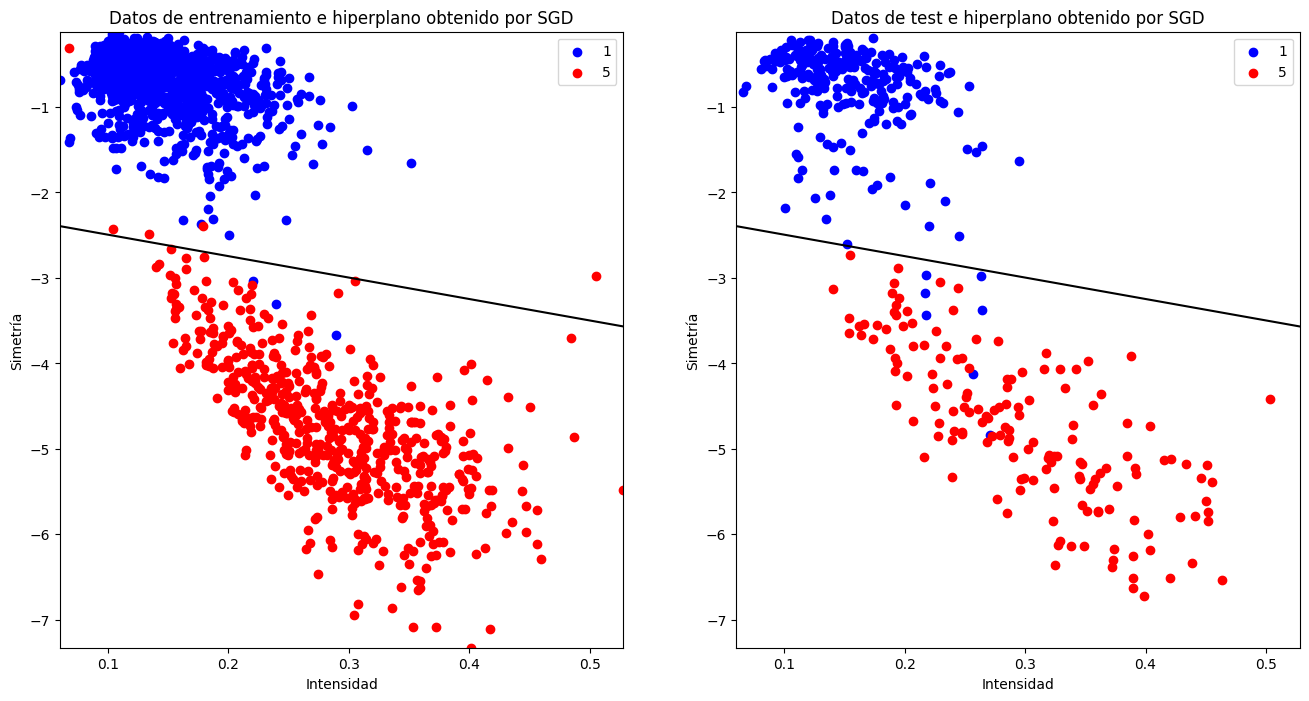


Bondad del resultado para el algoritmo de la pseudoinversa:

Ein:  0.07918658628900395
Eout:  0.13095383720052578


In [89]:
# Calculo w con el algoritmo de la matriz pseudoinversa
w = pseudoinverse(x, y)

# Creo unas figura 
fig = plt.figure(figsize=(16,8))

# Declaro los colores que se asignarán al gráfico
colores = plt.cm.colors.ListedColormap(['blue', 'red'])

# Primero muestro los datos de entrenamiento
plt.subplot(1,2,1)
plt.title("Datos de entrenamiento e hiperplano obtenido por SGD")
# Grafico los datos de entrenamiento
pendiente = -w[1]/w[2]
ordenada_origen = -w[0]/w[2]

# Dibujo la línea que separa los conjuntos
x_vals = np.array([np.min(x[:, 1]), np.max(x[:, 1])])
print([np.min(x[:, 1]), np.max(x[:, 1])])
y_vals = ordenada_origen + pendiente * x_vals
plt.plot(x_vals, y_vals, color='black')
plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])
# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
mask_blue = y == -1
mask_red = y == 1
plt.scatter(x[mask_blue, 1], x[mask_blue, 2], c='blue')
plt.scatter(x[mask_red, 1], x[mask_red, 2], c='red')
plt.legend(handles=[plt.scatter([],[], c='blue', label='1'), plt.scatter([],[], c='red', label='5')])
plt.xlabel('Intensidad')
plt.ylabel('Simetría')


# Realizo lo mismo con los datos de test
plt.subplot(1,2,2)
plt.title("Datos de test e hiperplano obtenido por SGD")
plt.plot(x_vals, y_vals, color='black')
plt.xlim([np.min(x[:, 1]), np.max(x[:, 1])])
plt.ylim([np.min(x[:, 2]), np.max(x[:, 2])])
# Divido los puntos en base a la etiqueta que les corresponde y los dibujo
mask_blue = y_test == -1
mask_red = y_test == 1
plt.scatter(x_test[mask_blue, 1], x_test[mask_blue, 2], c='blue')
plt.scatter(x_test[mask_red, 1], x_test[mask_red, 2], c='red')
plt.legend(handles=[plt.scatter([],[], c='blue', label='1'), plt.scatter([],[], c='red', label='5')])
plt.xlabel('Intensidad')
plt.ylabel('Simetría')

plt.show()

print ('\nBondad del resultado para el algoritmo de la pseudoinversa:\n')
print ("Ein: ", MSE(x,y,w))
print ("Eout: ", MSE(x_test, y_test, w))

<font color='blue'>¿Qué ventajas e inconvenientes presenta el uso de la pseudoinversa con respecto a gradiente descendente y viceversa?</font>

Viendo los resultados obtenidos en ambas ejecuciones podemos observar que el error calculado en el algoritmo de gradiente descendente es 0.0810 en los datos de entrenamiento y 0.1362 en los datos de test mientras que en el algoritmo de la pseudoinversa es 0.0791 y 0.1309 respectivamente.
Con estos datos podemos llegar a la conclusión que la pseudoinversa es algo más precisa, pues falla un 0.53% menos de veces. Sin embargo el algoritmo de la pseudoinversa tiene que calcular la traspuesta y la inversa de una matriz de datos la cual va a tener una gran cantida de elementos por lo que dicho algoritmo será bastante más costoso en tiempo. 

En conclusión, el algoritmo de la pseudoinversa es algo más preciso que el gradiente descendente, pero al ser tan pequeña la diferencia en precisión y tan grande la diferencia en tiempo de cómputo el algoritmo de gradiente descendente puede ser mejor cuando tratemos con muestras de gran tamaño y con un gran número de características.

### <font color='blue'>(3 puntos) En este apartado exploramos cómo se transforman los errores $E_{in}$ y $E_{out}$ cuando aumentamos la complejidad del modelo lineal usado. 
Ahora hacemos uso de la función $simula\_unif(N, 2, size)$ que nos devuelve $N$ coordenadas 2D de puntos uniformemente muestreados dentro del cuadrado definido por $[-size, size] \times [-size, size]$. Se debe realizar el siguiente experimento:</font>



In [97]:
# Simula datos en un cuadrado [-size,size]x[-size,size]
def simula_unif(N, d, size):
    return np.random.uniform(-size,size,(N,d))

<font color='blue'>a) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado
$\mathcal{X} =[-1, 1] \times [-1, 1]$. Pintar el mapa de puntos 2D.</font>




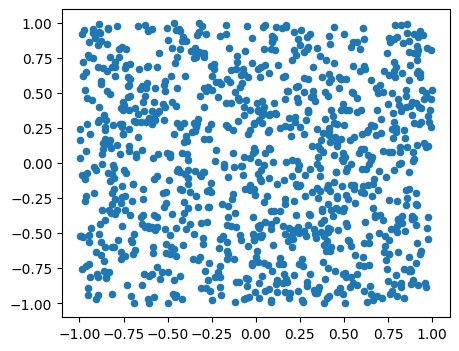

In [113]:
# a) Muestra de entrenamiento N = 1000, cuadrado [-1,1]x[-1,1]  
# Genero la muestra  
N = 1000
muestra = simula_unif(N, 2, 1)
# Visualizo la muestra
plt.figure(figsize=(5, 4))
plt.scatter(muestra[:, 0], muestra[:, 1], s=20)
plt.show()


<font color='blue'>b) Consideremos la función $f(x_1, x_2) = sign((x_1 - 0.2)^2 + x^2_2 - 0.6)$ que usaremos para asignar una etiqueta a cada punto de la muestra anterior. Introducimos
ruido sobre las etiquetas cambiando el signo de un 10\% de las mismas elegido aleatoriamente. Pintar el mapa de etiquetas obtenido. </font>



Muestra N = 1000, cuadrado [-1,1]x[-1,1]con etiquetas y ruido en el 10% de las etiquetas


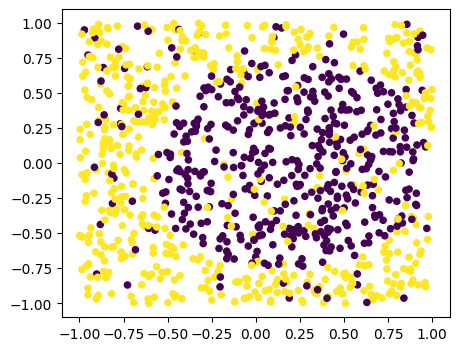

In [114]:
# b) Usamos la función f2 para asignar etiquetas a la muestra x e introducimos 
# ruido al 10% de las mismas

# Funcion signo
def sign(x):
    if x >= 0:
        return 1
    return -1

def f(x1, x2):
    return sign((x1-0.2)**2+x2**2-0.6) 

def introducir_ruido(y,porcent_ruido):
    ruido = np.random.rand(N) < porcent_ruido
    # Cambio el signo de la etiqueta de los puntos afectados
    y[ruido] *= -1
    return y

# Asigno una etiqueta a cada punto con f(x1, x2)
etiquetas = np.zeros(N)
for i in range(N):
  etiquetas[i] = f(muestra[i, 0], muestra[i, 1])

# Introduzco ruido en las etiqutas
etiquetas = introducir_ruido(etiquetas, 0.1)

print ('Muestra N = 1000, cuadrado [-1,1]x[-1,1]con etiquetas y ruido en el 10% de las etiquetas')

# Dibujo la muestra final
plt.figure(figsize=(5, 4))
plt.scatter(muestra[:,0], muestra[:,1], c=etiquetas, s=20)
plt.show()

<font color='blue'>c) Usando como vector de características $(1, x_1, x_2)$, ajustar un modelo de regresion
lineal al conjunto de datos generado y estimar los pesos $w$. Estimar el error de
ajuste $E_{in}$ y el porcentaje de acierto en clasificación usando SGD.</font>




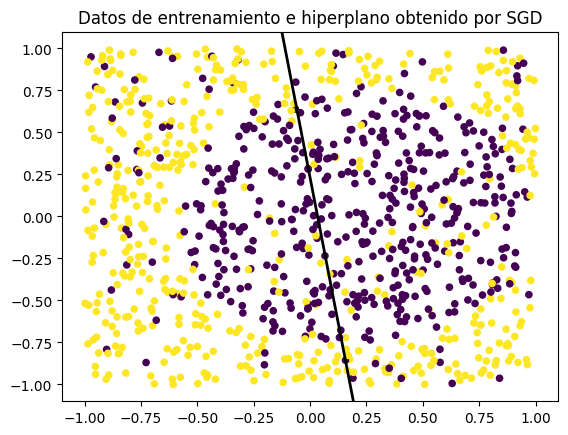

In [115]:
# Inserto un 1 en la primera componente de cada dato
muestra = np.insert(muestra, 0, 1, axis=1)

# Voy a usar el gradiente descendente estocástico para calcular w
w = sgd(muestra, etiquetas, 0.01, 10000, 32)

# Creo unas figura 
fig = plt.figure()

plt.title("Datos de entrenamiento e hiperplano obtenido por SGD")
# Grafico los datos de entrenamiento
pendiente = -w[1]/w[2]
ordenada_origen = -w[0]/w[2]

x_vals = np.array([np.min(muestra[:, 1]), np.max(muestra[:, 2])])
y_vals = ordenada_origen + pendiente * x_vals
plt.plot(x_vals, y_vals, color='black', linewidth=2)
plt.scatter(muestra[:,1], muestra[:,2], c=etiquetas, s=20)
plt.ylim([-1.1, 1.1])
plt.xlim([-1.1, 1.1])


plt.show()

In [116]:
# c) Modelo de regresión lineal, estimar Ein con SGD
print ('\nResultados para Modelo de regresión lineal:\n')
print ("Ein: ", MSE(muestra, etiquetas,w))


Resultados para Modelo de regresión lineal:

Ein:  0.9346772566228781


Al usar un modelo de regresión lineal cuando la muestra no lo permite, obtenemos una tasa de error del 93%

<font color='blue'>d) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000
muestras diferentes) y

- <font color='blue'>Calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.</font>

- <font color='blue'>Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor
de  $E_{out}$ en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las
iteraciones.</font>


In [117]:
# d) Ejecutar el experimento 1000 veces

# Implemento una función para generar una muestra
def generar_muestra(N):
  # Genero la muestra
  m = simula_unif(N, 2, 1)
  # Asigno etiquetass
  e = np.zeros(N)
  for i in range(N):
    e[i] = f(m[i, 0], m[i, 1])
  # Introduzco ruido
  e = introducir_ruido(e, 0.1)
  # Convierto mi vector de datos a la forma (1, x1, x2)
  m = np.insert(m, 0, 1, axis=1)

  return m, e

# Para ir acumulando el error calculado
Ein_medio = 0
Eout_medio = 0

# Repito el experimento 1000 veces
for i in range(1000):
  # Genero la muestra de entrenamiento
  muestra, etiqueta = generar_muestra(1000)
  # Ejecuto el algoritmo
  w = sgd(muestra, etiqueta, 0.01, 500, 20)
  # Calculo el error para los datos de entrenamiento
  Ein_medio += MSE(muestra, etiqueta, w)

  # Genero la muestra de test
  x_test, y_test = generar_muestra(1000)
  # Calculo el error para los datos de test
  Eout_medio += MSE(x_test, y_test, w)

# Divido los errores entre el número de iteraciones para calcular el error medio de cada tipo
Ein_medio /= 1000
Eout_medio /= 1000

# Muestro los resultados
print ('\Error medio para el modelo de regresión lineal:\n')
print ("Ein: ", Ein_medio)
print ("Eout: ", Eout_medio)



\Error medio para el modelo de regresión lineal:

Ein:  0.9286486017739845
Eout:  0.9340253335103271



<font color='blue'>e) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista
de los valores medios obtenidos de $E_{in}$ y $E_{out}$.</font>

Un modelo lineal para este tipo de datos proporciona resultados bastante malos. Nuestra muestra tiene una forma de círculo, donde en principio y sin tener el cuenta el ruido, los puntos que se encuentran dentro tienen una etiqueta y los que se encuentran fuera tienen otra. Esto provoca que, al intentar dividir ambos conjuntos con una línea recta no se pueda conseguir y obtengamos una tasa de error tan alta (93.40% en el caso de los test)

<font color='blue'>Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\phi_2(x) = (1, x_1, x_2, x_1x_2, x^2_1, x^2_2)$. Ajustar
el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\hat{w}$. Calcular
los errores promedio de $E_{in}$ y $E_{out}$.

A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos
experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta.</font>

In [118]:
def generar_muestraNL(N):
  # Genero la muestra
  m = simula_unif(N, 2, 1)
  # Asino etiquetas
  e = np.zeros(N)
  for i in range(N):
    e[i] = f(m[i, 0], m[i, 1])
    #introduzco ruido
  e = introducir_ruido(e, 0.1)
  # Convierto mi vector de datos a la forma (1, x1, x2, x1x2, x1^2, x2^2)
  m = np.insert(m, 0, 1, axis=1)

  x_1x2 = m[:, 1] * m[:, 2]
  x_1_cuadrado = np.square(m[:, 1])
  x_2_cuadrado = np.square(m[:, 2])

  m = np.concatenate((m, x_1x2.reshape(-1, 1), x_1_cuadrado.reshape(-1, 1), x_2_cuadrado.reshape(-1, 1)), axis=1)

  return m, e

# Calculo la recta que delimitará los conjuntos con los pesos de w
def recta(x, w0, w1, w2):
    x1, x2 = x
    return w0 + w1*x1 + w2*x2 + w1*x1*x2 + w1*x1**2 + w2*x2**2


Ein_medio = 0
Eout_medio =0

# Repito el experimento 1000 veces
for i in range(1000):
  # Genero la muestra de entrenamiento
  muestra, etiqueta = generar_muestraNL(1000)
  # Ejecuto el algoritmo
  w = sgd(muestra, etiqueta, 0.01, 500, 20)
  # Calculo el error para los datos de entrenamiento
  Ein_medio += MSE(muestra, etiqueta, w)

  # Genero la muestra de test
  x_test, y_test = generar_muestraNL(1000)
  # Calculo el error para la muestra de test
  Eout_medio += MSE(x_test, y_test, w)

# Divido los errores entre el número de iteraciones para calcular el error medio de cada tipo
Ein_medio /= 1000
Eout_medio /= 1000

print ('\Error medio :\n')
print ("Ein: ", Ein_medio)
print ("Eout: ", Eout_medio)


\Error medio :

Ein:  0.7005220316244948
Eout:  0.7089132650237876


Como he comentado anteriormente, nuestra muestra tiene una forma de círculo, donde en principio y sin tener el cuenta el ruido, los puntos que se encuentran dentro tienen una etiqueta y los que se encuentran fuera tienen otra. En este caso estoy usando un modelo no lineal para calcular el vector de características y como se puede observar en los resultados obtenidos, la tasa de error es del 70.89% en este caso. 

Por tanto, podemos llegar a la conclusión que hemos comentado en el ejercicio 1 de la práctica, lo más importante es conocer la función sobre la que trabajamos (en este caso la muestra de datos). Dependiendo de como sea, vamos a ejecutar ciertos algoritmos y de una forma u otra puesto que, si la muestra puede dividirse con un modelo lineal, será mucho más sencillo y rápido hacerlo mientras que si no se puede, la diferencia en porcentaje de error entre usar un modelo lineal o no lineal puede ser enorme.



---

## <font color='blue'> Bonus (2 puntos). Método de Newton

El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75\% de los puntos de la
parte obligatoria.</font>

<font color='blue'>Implementar el algoritmo de minimización de Newton y aplicarlo a la función $f(x, y) = (x - 2)^2 + 2(y + 2)^2 + 2 sin(2 \pi x) sin(2 \pi y)$. Comiéncese desde los puntos iniciales $(-4.0, 4.0)$ y $(0.4,0.0)$, usando dos tasas de aprendizaje ($0.1$ y $0.01$), y $250$ iteraciones. Haga lo mismo con la función $g(x,y)=(x + 2)^2 + 3(y - 1)^2$ (mismos puntos de inicio, tasas de aprendizaje e iteraciones). 
</font>

<font color='blue'>Extraiga conclusiones sobre el comportamiento de los algoritmos comparando la curva de
decrecimiento de la función con el método de Newton y con el  gradiente descendente, tanto en esta función ($g(x,y)$) como en la anterior ($f(x,y)$). Debe mostrarse también una tabla que asocie puntos iniciales y tasas de aprendizaje con las coordenadas alcanzadas y el valor de la función en dichos puntos finales.

¿Se observa alguna diferencia en el comportamiento del método de Newton en estas funciones? De ser así, ¿a qué puede deberse? ¿Qué ventajas e inconvenientes presenta el método de Newton en contraposición al gradiente descendente?</font>



### <font color='blue'> $f(x, y) = (x - 2)^2 + 2(y + 2)^2 + 2 sin(2 \pi x) sin(2 \pi y)$</font>

Para obtener la expresión del gradiente, tengo que realizar las derivadas parciales de la función respecto a sus dos variables:

$\frac{\partial}{\partial x} f(x,y) = 2x + 4 \pi \cdot cos(2 \pi x) \cdot sin(2 \pi y) -4 $

$\frac{\partial}{\partial y} f(x,y) = 4y + 4 \pi \cdot sin(2 \pi x) \cdot cos(2 \pi y) + 8  $

Para obtener la expresión del gradiente, tengo que realizar las segundas derivadas parciales de la función respecto a sus dos variables:

$\frac{\partial^2}{\partial x^2} g(x,y) = -8 \pi^2 \cdot sin(2 \pi x) \cdot sin(2 \pi y) + 2$ 

$\frac{\partial^2}{\partial y^2} g(x,y) = -8 \pi^2 \cdot sin(2 \pi y) \cdot sin(2 \pi x) + 4 $ 

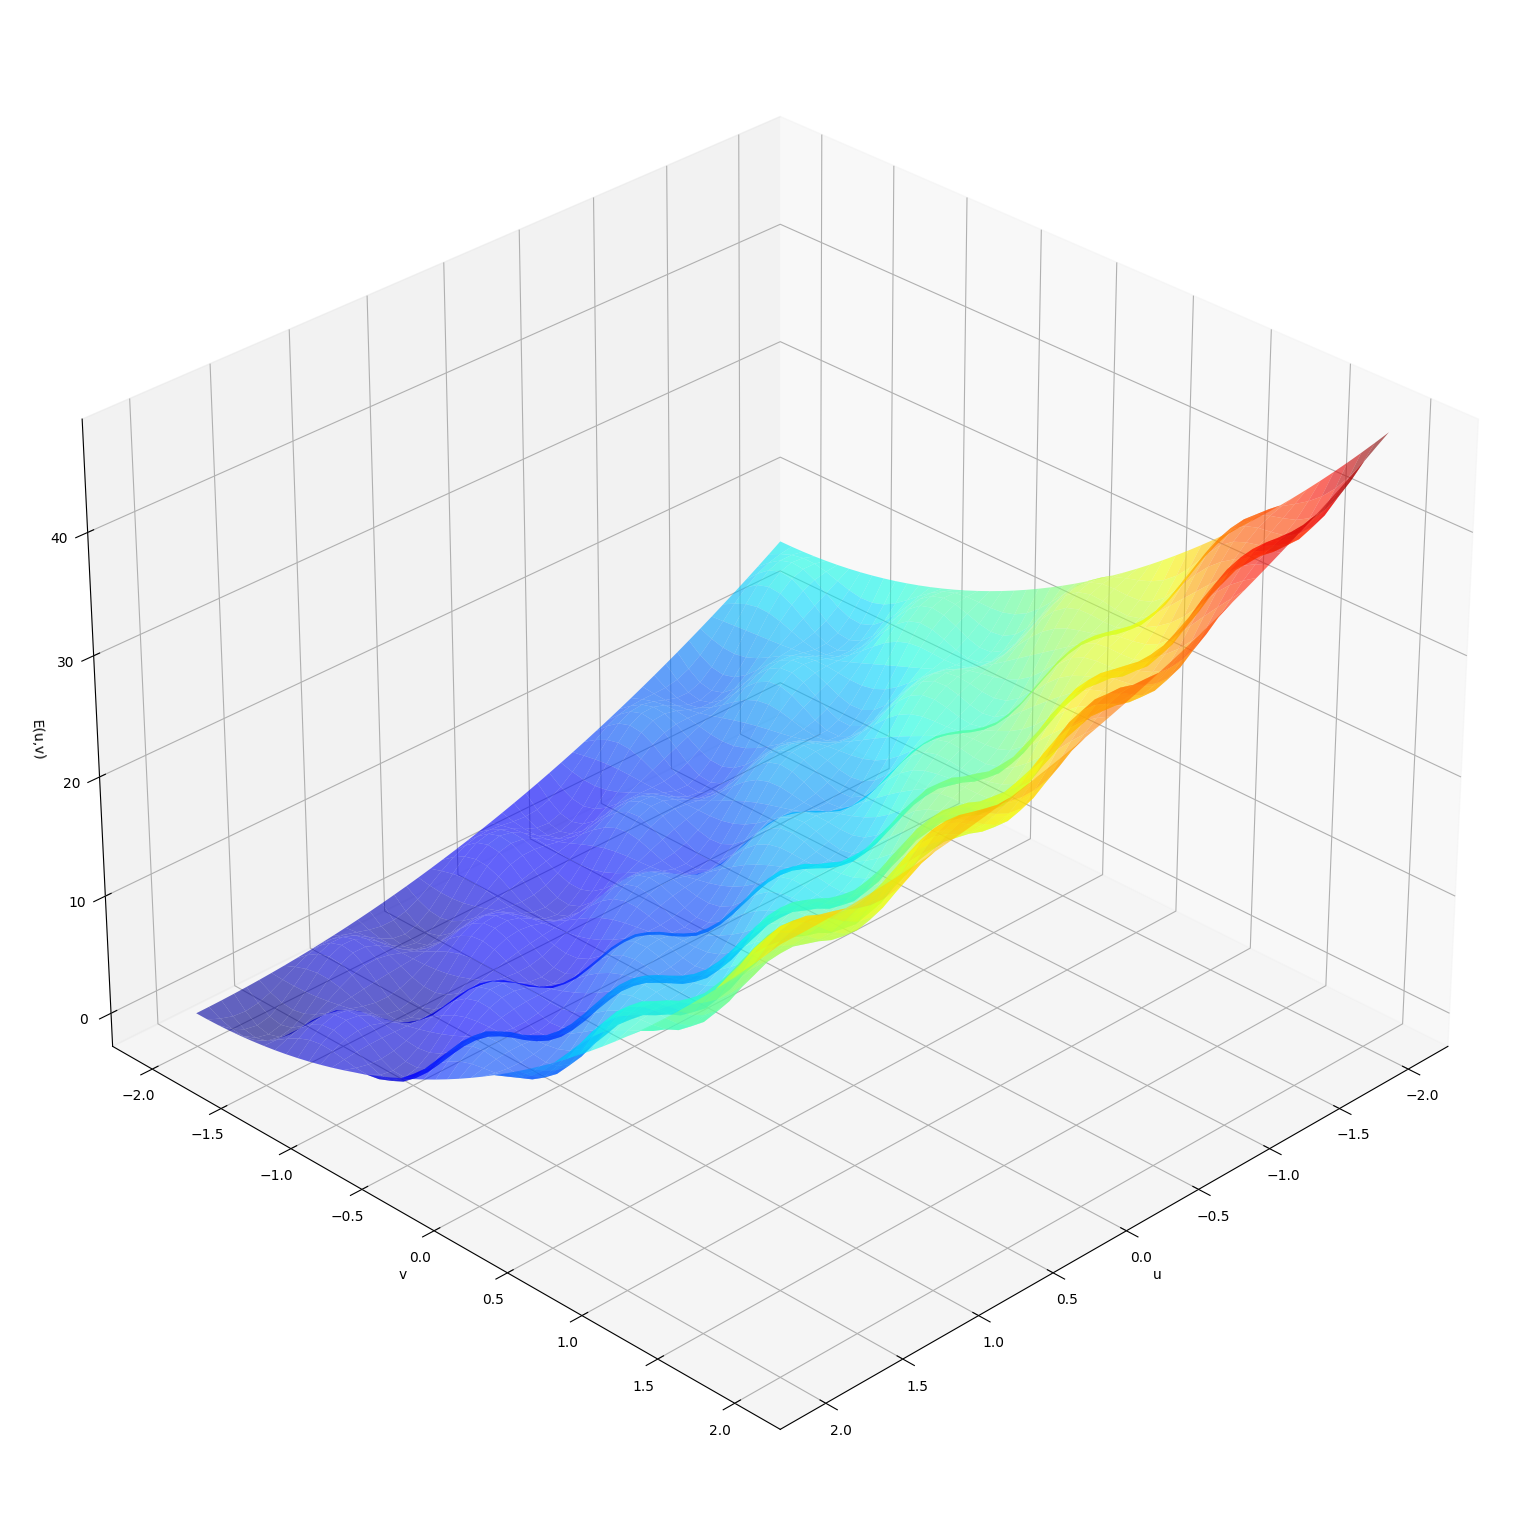

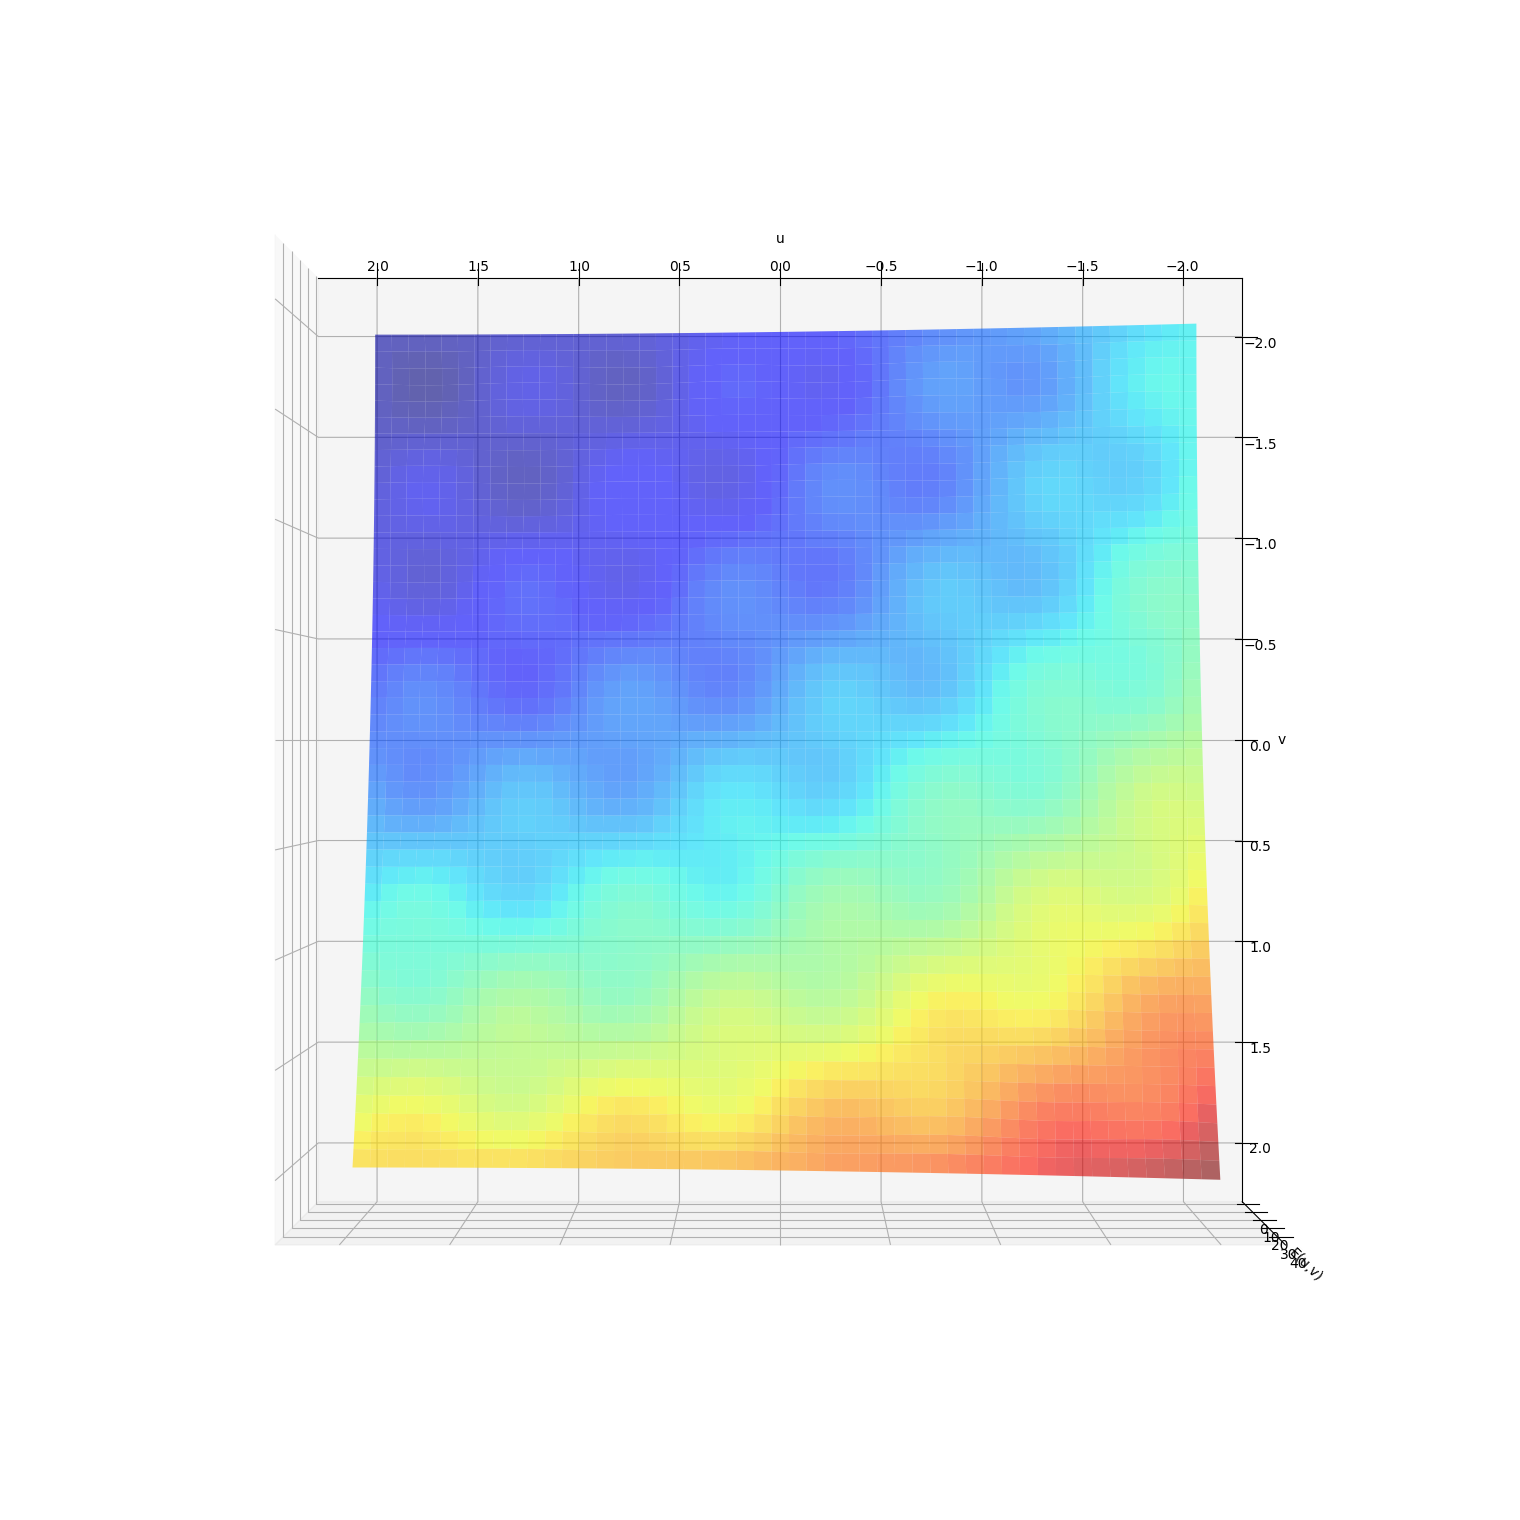

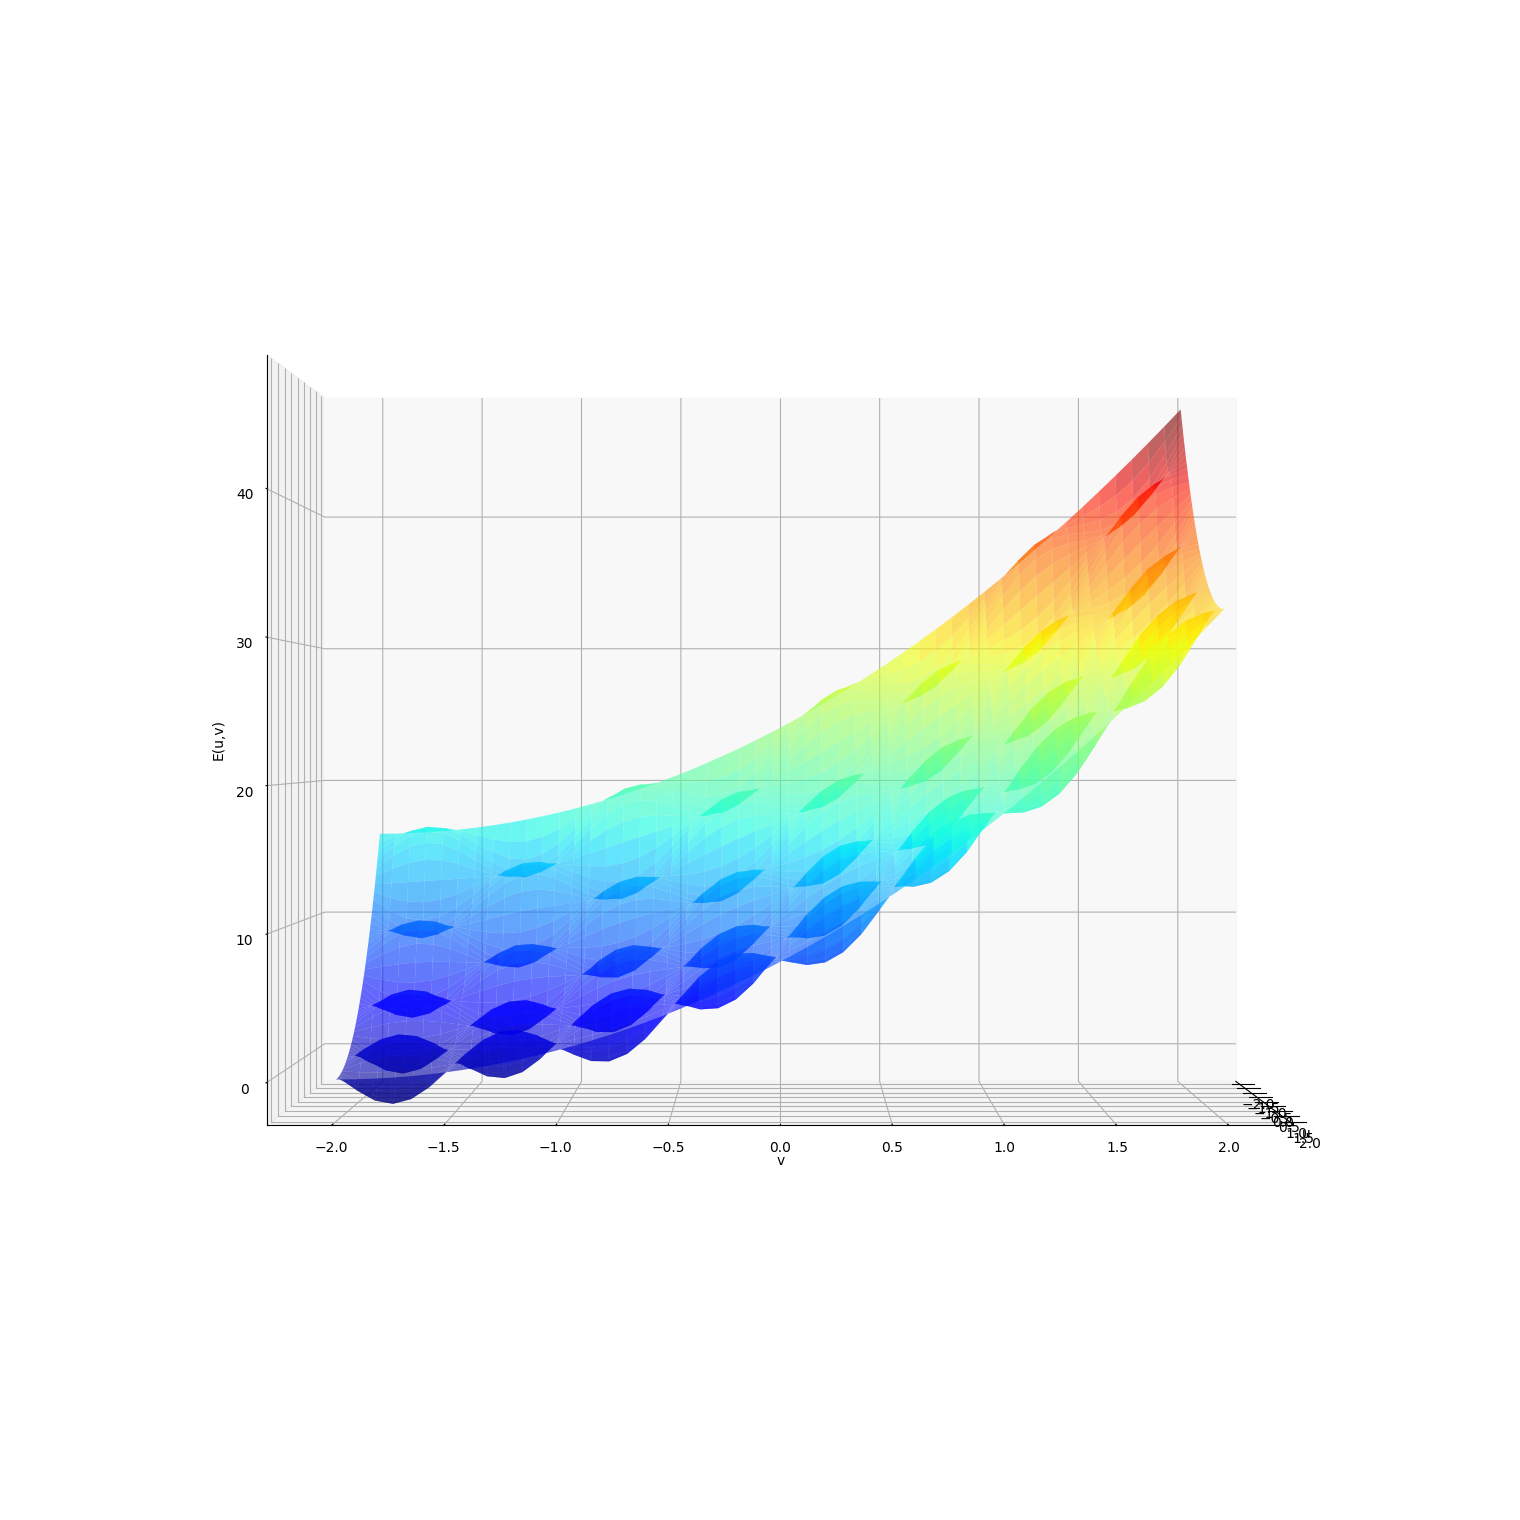

In [208]:
def f(w):
    return (w[0]-2)**2 + 2*(w[1]+2)**2 + 2*np.sin(2*math.pi*w[0])*np.sin(2*math.pi*w[1])

# Derivada parcial de E respecto de x
def f_x(w):
    return 2*w[0] + 2*math.pi*np.cos(2*math.pi*w[0])*np.sin(2*math.pi*w[1]) - 4

# Derivada parcial de E respecto de y
def f_y(w):
    return 4*w[1] + 4*math.pi*np.sin(2*math.pi*w[0])*np.cos(2*math.pi*w[1]) - 8
        
# Gradiente de E
def gradf(w):
    return np.array([f_x(w), f_y(w)])

# Segunda derivada parcial de E respecto de x
def H_xf(w):   
    return -8 * math.pi**2 * np.sin(2*math.pi*w[0]) * np.sin(2*math.pi*w[1]) + 2

# Segunda derivada parcial de E respecto de y
def H_yf(w):   
    return -8 * math.pi**2 * np.sin(2*math.pi*w[1]) * np.sin(2*math.pi*w[0]) + 4

# Hessiana de E
def Hesf(w):
    return np.array([H_xf(w), H_yf(w)])

# Dibujo la función 
display_figure(2, f, [],  [45,30], 'jet', [])
display_figure(2, f, [],  [90,90], 'jet', [])
display_figure(2, f, [],  [0,0], 'jet', [])


In [243]:
# Metodo de Newton
def newtonMethod(w, lr, grad_fun, fun, H, max_iters = 250):  
  ws = []
  ws.append(w)
  for i in range(max_iters): 
    grad = grad_fun(w)
    hessiana = H(w)

    # Calcula la dirección de búsqueda y actualiza el punto
    w -= lr *(grad / hessiana)
    ws.append(w)
    # Evalúa la función en el nuevo punto
    valor = fun(w)

  return w, ws

In [210]:
w, ws = newtonMethod(np.array([-0.0,1.0]) , 0.01, gradf, f, Hesf)
print(w)

[-0.10200667  1.30263747]


### <font color='blue'> $g(x,y)=(x + 2)^2 + 3(y - 1)^2$</font>

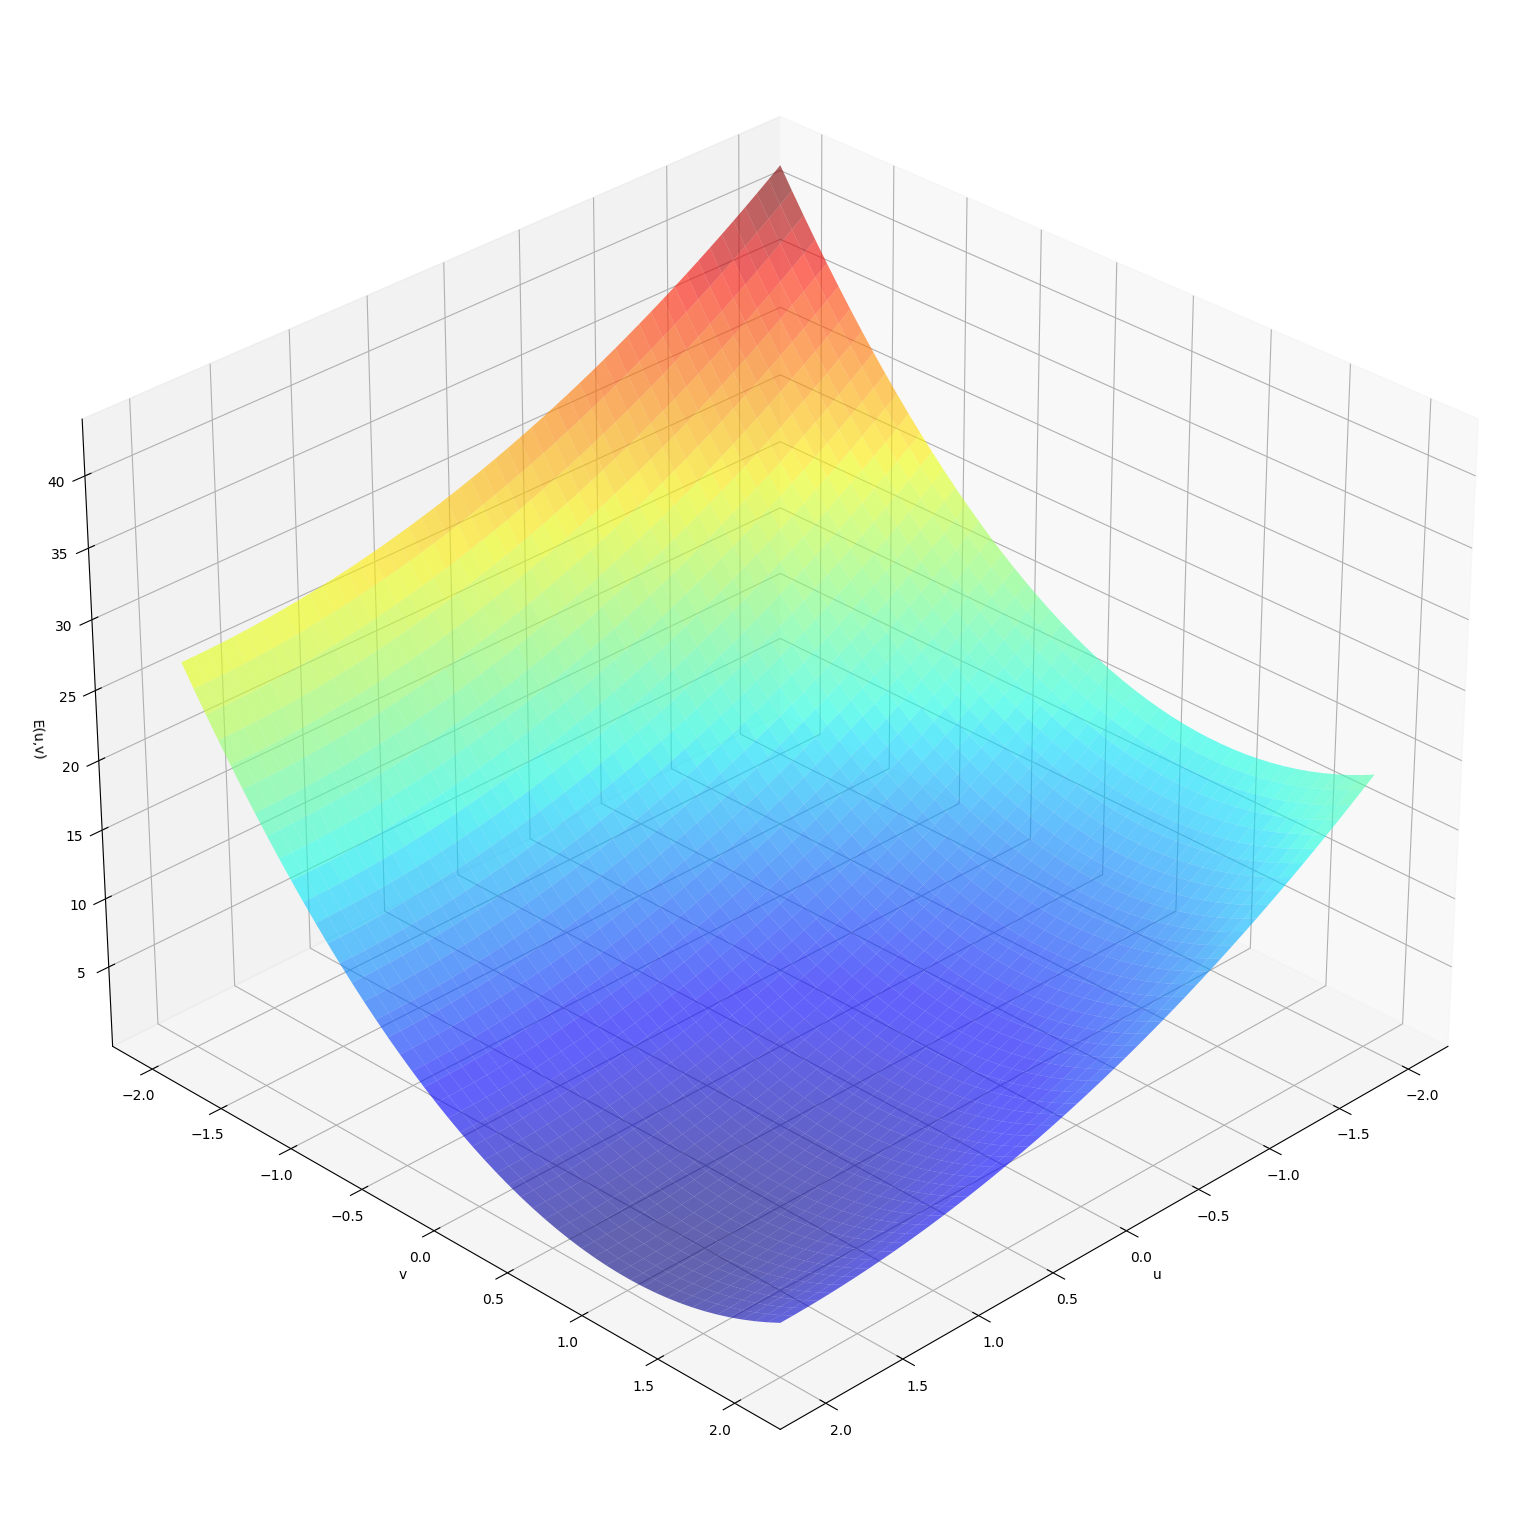

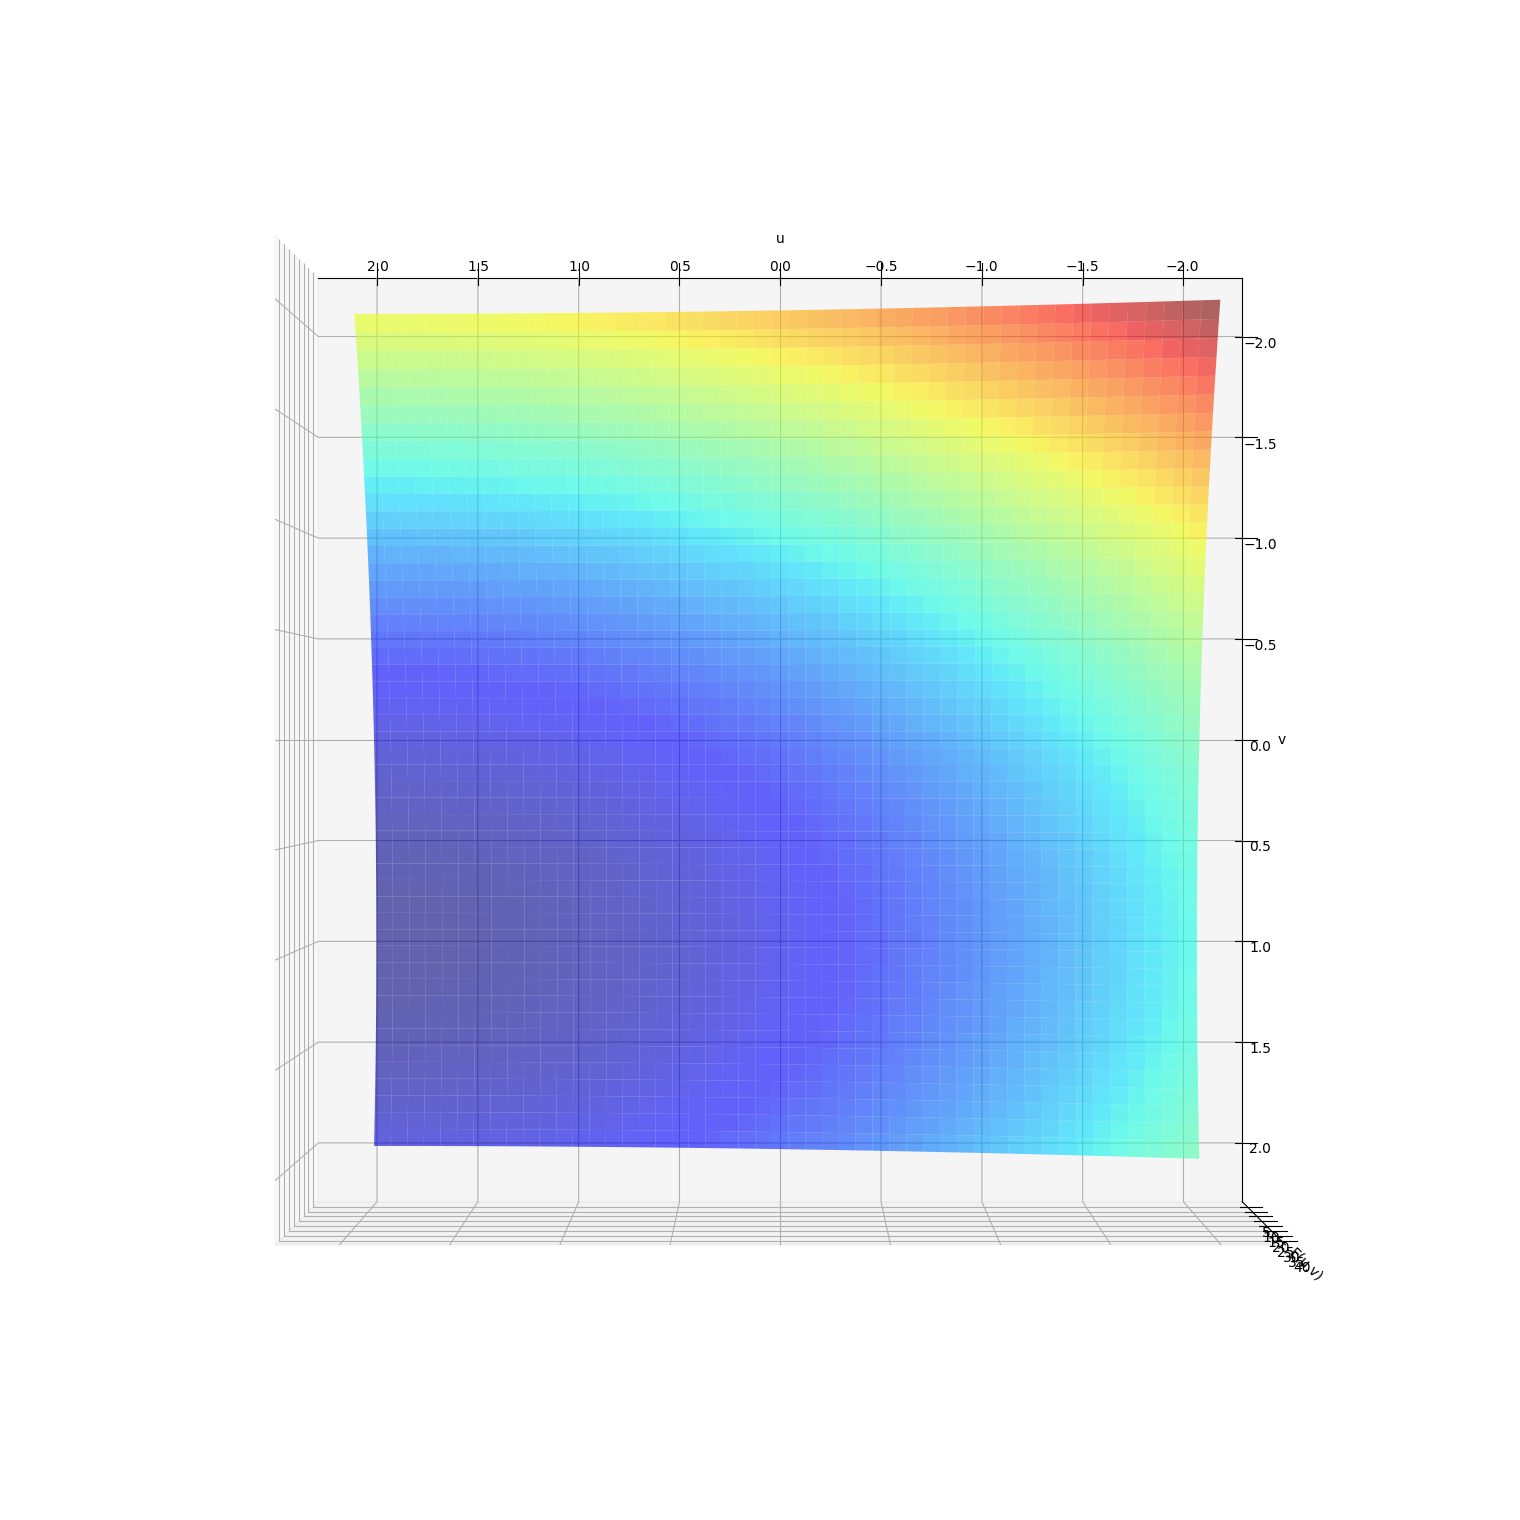

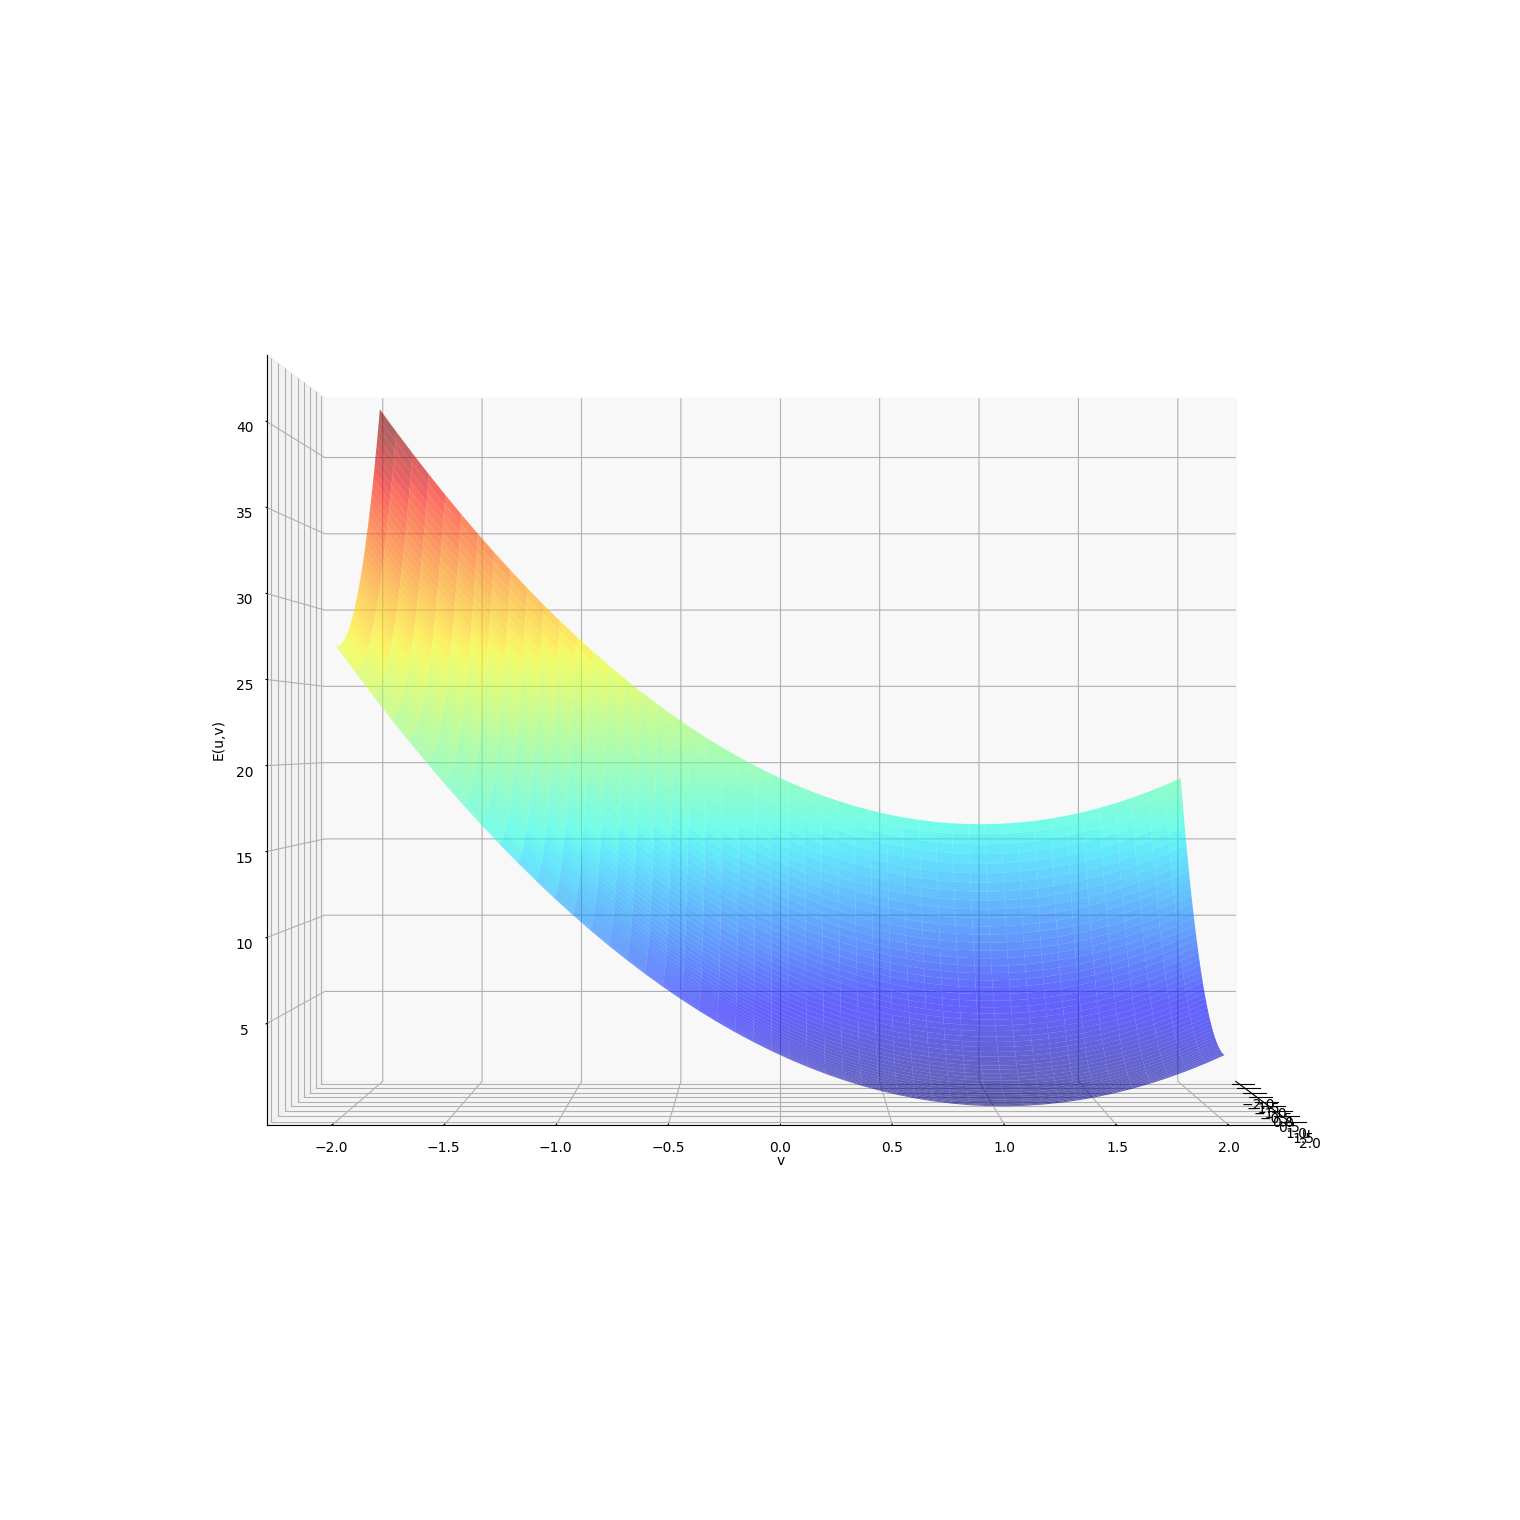

In [211]:
def g(w):
    return (w[0]-2)**2 + 3*(w[1]-1)**2

def g_x(w):
    return 2*w[0] + 4

# Derivada parcial de E respecto de y
def g_y(w):
    return 6*w[1] - 6
        
# Gradiente de E
def gradg(w):
    return np.array([g_x(w), g_y(w)])

# Segunda derivada parcial de E respecto de x
def H_xg(w):   
    return 2

# Segunda derivada parcial de E respecto de y
def H_yg(w):   
    return 6

# Hessiana de E
def Hesg(w):
    return np.array([H_xg(w), H_yg(w)])


display_figure(2, g, [],  [45,30], 'jet', [])
display_figure(2, g, [],  [90,90], 'jet', [])
display_figure(2, g, [],  [0,0], 'jet', [])

In [212]:
w, ws = newtonMethod(np.array([0.0, 0.0]) , 0.01, gradg, g, Hesg)
print(w)

[-1.83788297  0.91894148]


### <font color='blue'> Comparativa global. </font>

In [245]:
# Defino las dos tasas de aprendizaje
lr1 = 0.1
lr2 = 0.01

# Defin0 los puntos iniciales
inicial = np.array([[-4.0,4.0], [0.4,0.0]])
resultados = []
# Voy recorriendo los puntos iniciales y calculando el gradiente para ambas tasas de aprendizaje

w1, ws = newtonMethod([-4.0,4.0] , lr1, gradf, f, Hesf)
w2, ws = newtonMethod([-4.0,4.0] , lr2, gradf, f, Hesf)
w3, ws = newtonMethod([-4.0,4.0] , lr1, gradg, g, Hesg)
w4, ws = newtonMethod([-4.0,4.0] , lr2, gradg, g, Hesg)

resultados.append([[-4.0,4.0], w1, f(w1), w2, f(w2), w3, g(w3), w4, g(w4),])

w1, ws = newtonMethod([0.4,0.0] , lr1, gradf, f, Hesf)
w2, ws = newtonMethod([0.4,0.0] , lr2, gradf, f, Hesf)
w3, ws = newtonMethod([0.4,0.0] , lr1, gradg, g, Hesg)
w4, ws = newtonMethod([0.4,0.0] , lr2, gradg, g, Hesg)

resultados.append([[0.4,0.0], w1, f(w1), w2, f(w2), w3, g(w3), w4, g(w4),])

# Creo una tabla con los resultados
df = pd.DataFrame(resultados, columns=['Punto inicial', 'funcion f con lr=0.1', 'valor de la funcion', 'funcion f con lr=0.01','valor de la funcion',
                                       'funcion g con lr=0.1','valor de la funcion', 'funcion g con lr=0.01', 'valor de la funcion'])

print(df)

  Punto inicial                      funcion f con lr=0.1  \
0   [-4.0, 4.0]   [-2.482660610333828, 2.653710468289288]   
1    [0.4, 0.0]  [0.8267116135049533, 0.3509110964717744]   

   valor de la funcion                      funcion f con lr=0.01  \
0            63.587151    [-4.1779146069937125, 3.68768442932297]   
1            11.002462  [0.7522193956853991, 0.32219760325896063]   

   valor de la funcion                       funcion g con lr=0.1  \
0           104.528384  [-2.0000000000072724, 1.0000000000109082]   
1            10.544611   [-1.9999999999912734, 0.999999999996364]   

   valor de la funcion                      funcion g con lr=0.01  \
0                 16.0  [-2.1621170323243635, 1.2431755484865443]   
1                 16.0  [-1.8054595612107647, 0.9189414838378187]   

   valor de la funcion  
0            17.500621  
1            14.501234  


En esta comparativa, volvemos a ver el cambio en los resultados que llevamos viendo toda la práctica. en la función f avanzaremos hacia un óptimo u otro dependiendo del punto de partida que escojamos. Sin embargo, en la función g sólo hay un mínimo al que avanzar por lo que el punto de inicio es un dato irrelevante, qeu solo va a infuir en el número de iteraciones que necesitemos para alcanzar nuestro óptimo.

Por otra parte, si miramos la comparativa de diferente learning rate si podemos observar una diferencia en la precisión puesto que, en la funcion f alcanzamos un valor menor al usar un learning rate mayor. Esto se debe a que cuando usamos lr=0.01 nuestro método 'avanza' demasiado despacio y llega al número máximo de iteraciones antes de acercarse al óptimo lo suficiente. Por otro lado, en la función g el óptimo que buscamos está cercano a los puntos iniciales y, por tanto, no vamos a tener el problema de no alcanzar dicho óptimo por lo que obtenemos un mejor resultado con el learning rate menor ya que aporta mayor precisión. 

En este ejemplo es una demostración perfecta de la importancia de elegir un buen punto de partida y una buena tasa de aprendizaje, pues son los parámetros que provocan que tengamos éxito en nuestra búsqueda.

### <font color='blue'> Número de iteraciones necesarias para alcanzar un valor determinado.

Empléese gradiente descendente (usando una tasa de aprendizaje de $0.1$) y el método de Newton (sin learning rate) para minimizar la función $g(x,y)$ desde los puntos $(-4.0, 4.0)$ y $(0.4,0.0)$. Póngase un número máximo de iteraciones de $250$. ¿Cuántas iteraciones necesita cada algoritmo para alcanzar un valor de $1e-20$? </font>